# Final Project Submission

* Student name: Shayan Abdul Karim Khan
* Student pace: Self Paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni

## Problem Overview

Each year more than 42,000 people are needlessly killed on American streets and thousands more are injured. We call this suffering traffic “accidents” — but, in reality, we have the power to prevent traffic collisions. To counter these fatalities and injuries, the Department of Transportations (DOTs) across the US are working towards a new vision for safety called "Vision Zero". 

Vision Zero recognizes that people will sometimes make mistakes, so the road system and related policies should be designed to ensure those inevitable mistakes do not result in severe injuries or fatalities. This means that system designers and policymakers are expected to improve the roadway environment, policies (such as speed management), and other related systems to lessen the severity of crashes by working with stakeholders ranging from auto manufacturers to policy makers.

Similarly, the Chicago DOT wants to conduct a study to understand the underlying patterns for car accidents. The ask is to use the data available to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. 

## Data Sources

The data being used is from the Chicago Polic Department (CPD) and is provided oninee by the City of Chicago. The data is from 2015 to the present day. It is updated daily but the data being used as a part of this project is recent until 3rd February 2023. 

There are 3 datasets being used for analysis:

1. Traffic crashes data summary: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifv 
<br>

2. Vehicles information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3 
<br>

3. People information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d 

Considering that this is the official dataset of the City of Chicago regarding traffic crashes, it can be easilly concluded that it would be the most reliable dataset available. Using this dataset will also increase the confidence of the client on the results and recommendations of this project. 

## Data Understanding

This section will be exploratory to understand the different features of the data. All three datasets will be explored separately. Using the source documentation, data and the features will be interpreted and determinations will be made about which features are relevant to identifying the causes of car crashes. Towards the end of exploring the data, avenues of analysis that can be used will also become clearer. As data is explored, any anomalies or issues require further cleaning/processing will be identified and handled in the `Data Preparation` section.

To start things off, lets import all the libraries and functions that will be used in this notebook.

In [205]:
import pandas as pd #imports the pandas library as pd to work on databases
from sodapy import Socrata # for API integration
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
from datetime import datetime # for datetime manipulation
import matplotlib.pyplot as plt # importing matplotlib for visualizations 

%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn
from collections import Counter #import Counter
import statsmodels.api as sm #import stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import scikit library functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV


#import scipy libraries
from scipy import stats as stats

#import plotly
import plotly.express as px
import plotly.graph_objects as go

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

### Traffic Crashes - Crashes

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Crashes`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if.

Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

As per Illinois statute, only crashes with a property damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes. However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [206]:
#import the dataset using the API endpoint
crashes_df = pd.read_csv('data/Traffic_Crashes-Crashes.csv')

#preview thee first 5 rows
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [207]:
#Explore the info for all the features
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                692784 non-null  object 
 1   RD_NO                          688672 non-null  object 
 2   CRASH_DATE_EST_I               52531 non-null   object 
 3   CRASH_DATE                     692784 non-null  object 
 4   POSTED_SPEED_LIMIT             692784 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         692784 non-null  object 
 6   DEVICE_CONDITION               692784 non-null  object 
 7   WEATHER_CONDITION              692784 non-null  object 
 8   LIGHTING_CONDITION             692784 non-null  object 
 9   FIRST_CRASH_TYPE               692784 non-null  object 
 10  TRAFFICWAY_TYPE                692784 non-null  object 
 11  LANE_CNT                       198997 non-null  float64
 12  ALIGNMENT                     

There are a number of columns with missing values but they can also simply be categorical columns that don't apply to all records. The documentation on the columns available on https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if can be used to explore the columns separately. The descriptions have also been listed below.

1. `CRASH_RECORD_ID`: This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. This will be important for joining the databases.
<br>

2. `RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes.
This column can be ignored since this does not give us any insight into the causes of crashes. **DROP COLUMN**
<br>

3. `CRASH_DATE_EST_I`: Crash date estimated by desk officer or reporting party (only used in cases where crash is reported at police station days after the crash). This column can be ignored since there are missing values here. There is another column for Crash Dates but has no missing values. **DROP COLUMN**
<br>

4. `CRASH_DATE`: Date and time of crash as entered by the reporting officer. This gives us insight into if there are periods where there are more crashes than others. If there is a discernable pattern, appropriate preventative measures can be taken. The time and date will have to be separated out for individual analysis. Also the initial description of thee dataset mentions that 2018 onwards citywide E-craash daat aiss available. Therefore, the data will be filtered out accordingly. Also, the daata has to be changed to datetime versions for proper use.
<br>

5. `POSTED_SPEED_LIMIT`: Posted speed limit, as determined by reporting officer. This is the speed limit for the area where the crash happened. This coupled with the speed that the car was travelling at can help inform if the crash was at high speeds. Consequently, this can be a critical contirbutor in determining the cause of the crash.
<br>

6. `TRAFFIC_CONTROL_DEVICE`: Traffic control device present at crash location, as determined by reporting officer. It would be important to understand the contents of this column before making a decision on its use. 

In [208]:
# checking null values
crashes_df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4112
CRASH_DATE_EST_I                 640253
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         493787
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       19010
CRASH_TYPE                            0
INTERSECTION_RELATED_I           533987
NOT_RIGHT_OF_WAY_I               660299
HIT_AND_RUN_I                    477815
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [209]:
#check unique values
crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 397249
TRAFFIC SIGNAL              192000
STOP SIGN/FLASHER            68792
UNKNOWN                      24545
OTHER                         4515
LANE USE MARKING              1226
YIELD                          977
OTHER REG. SIGN                721
OTHER WARNING SIGN             591
RAILROAD CROSSING GATE         448
PEDESTRIAN CROSSING SIGN       384
DELINEATORS                    271
SCHOOL ZONE                    263
FLASHING CONTROL SIGNAL        248
POLICE/FLAGMAN                 243
OTHER RAILROAD CROSSING        159
RR CROSSING SIGN                93
NO PASSING                      40
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

There are multiple categories but the `NO CONTROLS` category stands out with almost 50% share in the data for this column. The other categorieswould be location dependent signage. This data can be used to determine whether `NO CCONTROLS` plays a significantlt higher part in certain types of crashes. The data in this column can be grouped together to only two categories, `NO CONTROLS` and `CONTROLS`.

7. `DEVICE_CONDITION`: Condition of traffic control device, as determined by reporting officer. This would be an important aspect to consider. Lets explore the contents of this column.

In [210]:
#check unique values
crashes_df['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 401903
FUNCTIONING PROPERLY        238515
UNKNOWN                      41164
OTHER                         5347
FUNCTIONING IMPROPERLY        3373
NOT FUNCTIONING               2143
WORN REFLECTIVE MATERIAL       258
MISSING                         81
Name: DEVICE_CONDITION, dtype: int64

Considering that this column also has a demarcated category of `NO CONTROLS` with categories highlighting whther there were any issues with the traffic control devices present, it would be more useful to use this column rather than using the `TRAFFIC_CONTROL_DEVICE` column. It is also clear that having no controls is the biggest contributor to traffic crashes but what kind of impact they have is something that has to be explored.

Therefore, **DROP `TRAFFIC_CONTROL_DEVICE` COLUMN**

`WEATHER_CONDITION`: Weather condition at time of crash, as determined by reporting officer. This will definitely be a big factor in predicting the cause of crashes as well since the weather can play a big part in traffic accidents. Lets take a look at the contents of the column.

In [211]:
#check unique values
crashes_df['WEATHER_CONDITION'].value_counts()

CLEAR                       546474
RAIN                         59674
UNKNOWN                      34543
SNOW                         25734
CLOUDY/OVERCAST              20505
OTHER                         2204
FREEZING RAIN/DRIZZLE         1229
FOG/SMOKE/HAZE                1031
SLEET/HAIL                     881
BLOWING SNOW                   367
SEVERE CROSS WIND GATE         138
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

The unkown data has to be dealt with in the **Data Preparation** section but all other data will be valuable to carry forward. It seems like the most car crashes take place in the clear weather while the worse the weather is the fewer car crashes there are. This might be becausee people naturally are more carefull during bad weather. Nonetheless this has to be inveestigated more to see whether inclement weather accidents are more serious or impact specific types of vehicles. It can also be that there are less vehicles on the road during inclement weather therefore while the numbers might be low, the ratio of cars on the road and number of accidents might be high.

`LIGHTING_CONDITION`: Light condition at time of crash, as determined by reporting office. This is also another big factor. Theoretically, bad lighting conditions can play a big part in car crashes. This column can prove to be critial. Lets invvestigate it to understand the contents.

In [212]:
#check unique values
crashes_df['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  445517
DARKNESS, LIGHTED ROAD    153269
DARKNESS                   33364
UNKNOWN                    28678
DUSK                       20317
DAWN                       11639
Name: LIGHTING_CONDITION, dtype: int64

In [213]:
crashes_df['LIGHTING_CONDITION'].value_counts(normalize=True)

DAYLIGHT                  0.643082
DARKNESS, LIGHTED ROAD    0.221236
DARKNESS                  0.048159
UNKNOWN                   0.041395
DUSK                      0.029327
DAWN                      0.016800
Name: LIGHTING_CONDITION, dtype: float64

Similar to the weather conditions data, it looks like the best lighting condition has the most accidents. This can be either be because peoplee are generally more careful when there's less light or that there are fewer cars on the road therefore fewer accidents. Regardless, considering that almost 91% of crashes occured in either Daylight, Lighted roads, or unknown, means that this data will not be able to help us greatlly distinguish patterns in the causes of the crashes.

**DROP LIGHTING_CONDITION COLUMN**

`ROAD_DEFECT`: Road defects, as determined by reporting officer. This might be important. Lets take a look at the data first.

In [214]:
#check unique values
crashes_df['ROAD_DEFECT'].value_counts()

NO DEFECTS           565943
UNKNOWN              112665
RUT, HOLES             5561
OTHER                  3858
WORN SURFACE           2859
SHOULDER DEFECT        1350
DEBRIS ON ROADWAY       548
Name: ROAD_DEFECT, dtype: int64

In [215]:
#check the ratios
crashes_df['ROAD_DEFECT'].value_counts(normalize=True)

NO DEFECTS           0.816911
UNKNOWN              0.162626
RUT, HOLES           0.008027
OTHER                0.005569
WORN SURFACE         0.004127
SHOULDER DEFECT      0.001949
DEBRIS ON ROADWAY    0.000791
Name: ROAD_DEFECT, dtype: float64

Almost 97% of the crashes occured in NO DEFECTS or UNKOWN zones which means that this data will not help in any significant way. 

**DROP ROAD_DEFECT COLUMN**

`REPORT_TYPE`: Administrative report type (at scene, at desk, amended). This column can be ignored for the purposes of this analysis.

**DROP REPORT_TYPE COLUMN**

`CRASH_TYPE`: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away. This data will be used to filter on crashes that had injuries or fatalities. While the eventual goal is to have no crashes, the goal of this analysis is to support work towards Vision Zero which focuses on fatalities and injuries. Lets investigate the contents if this column before movving on.

In [216]:
#check unique values
crashes_df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

With only 180,000 records, out data size will be significantly reduced but helps us focus on the main problem.

`INTERSECTION_RELATED_I`: A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection. 
Lets investigate the contents of this column.

In [217]:
#check unique values
crashes_df['INTERSECTION_RELATED_I'].value_counts()

Y    151396
N      7401
Name: INTERSECTION_RELATED_I, dtype: int64

This column has several missing values that we can't replace and dropping those records would be detrimeental to the dataset. Therefore this column can be ignored.

**DROP INTERSECTION_RELATED_I COLUMN**

`NOT_RIGHT_OF_WAY_I`: Whether the crash begun or first contact was made outside of the public right-of-way. This column also has almost 50% of its values missing. Also, this gives us insight into the circumstances around a crash but not significant insight into the cause of a crash. 

**DROP NOT_RIGHT_OF_WAY_I COLUMN**

`HIT_AND_RUN_I`: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid. This gives us inight into the aftermaths of the crash but no significant insight into the cause of it.

**DROP HIT_AND_RUN_I COLUMN**

`DAMAGE`: A field observation of estimated damage. Similar to the previous two, this doesn't provide insight into the causes of the crash. 

**DROP DAMAGE COLUMN**

`DATE_POLICE_NOTIFIED`: Calendar date on which police were notified of the crash. Similarly, this doesn't provide any insight into the causes of the crash.

**DROP DATE_POLICE_NOTIFIED COLUMN**

`PRIM_CONTRIBUTORY_CAUSE`: The factor which was most significant in causing the crash, as determined by officer judgment. This will be the target column that will be used. Lets investigate the contents of this column.

In [218]:
#check unique values
crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 266260
FAILING TO YIELD RIGHT-OF-WAY                                                        75716
FOLLOWING TOO CLOSELY                                                                69035
NOT APPLICABLE                                                                       36421
IMPROPER OVERTAKING/PASSING                                                          33504
FAILING TO REDUCE SPEED TO AVOID CRASH                                               29613
IMPROPER BACKING                                                                     28228
IMPROPER LANE USAGE                                                                  25526
IMPROPER TURNING/NO SIGNAL                                                           22879
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22419
DISREGARDING TRAFFIC SIGNALS                                                         13383

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`SEC_CONTRIBUTORY_CAUSE`: The factor which was second most significant in causing the crash, as determined by officer judgment. Similar to the previous one, this will be an important column in analysis.

In [219]:
#check unique values
crashes_df['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      282372
UNABLE TO DETERMINE                                                                 251338
FAILING TO REDUCE SPEED TO AVOID CRASH                                               26909
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  21221
FAILING TO YIELD RIGHT-OF-WAY                                                        21098
FOLLOWING TOO CLOSELY                                                                18283
IMPROPER OVERTAKING/PASSING                                                          10318
IMPROPER LANE USAGE                                                                   9863
WEATHER                                                                               8260
IMPROPER TURNING/NO SIGNAL                                                            6921
IMPROPER BACKING                                                                      5666

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`STREET_NO`: Street address number of crash location, as determined by reporting officer. While this is a valuable data point, there are latitude and longtitude data points which can proove to be more useful.

**DROP STREET_NO COLUMN**

Similarly, `STREET_DIRECTION`, `STREET_NAME`, and `BEAT_OF_OCCURRENCE` can be **DROPPED**.

Also `PHOTOS_TAKEN_I` and `STATEMENTS_TAKEN_I` are relevant to the police investigation records but not for the purposes of this notebook's analysis. Therefore they can be **DROPPED**

`WORK_ZONE_I`, `WORK_ZONE_TYPE`, and `WORKERS_PRESENT_I` are important columns to caarry forward. Usually these aree critical areas where speed limits are significantly reduced and there is a lot of worker traffic during shift hours. These can be very sensitive areas that can be significant towards attaining Vision Zero therefore it will be interesting to see their contribution towards crashes. 

Nonetheless we can drop the `WORK_ZONE_TYPE` column since the granularity of the analysis isn't specifically based on work zone type crashes. If aa significant correlation is found, then this area can be further investigated in future analysis.

`NUM_UNITS` will be an important data point since it gives information on the number of units involved in the crash.

Similarly, aligning with the Vision Zero goal, `INJURIES_TOTAL` and `INJURIES_FATAL` would be valuable columns to use in analysis. The other Injuries columns can be **DROPPED**.

`CRASH_HOUR`, `CRASH_DAY_OF_WEEK`, and `CRASH_MONTH` can be used instead of the timesatamp in column `CRASH_DATE` since these are broken down values. Nonetheless, what would be valuable from the timestamp column is the year of the crash. It might be possible that the year can play a big part in recognizing patterns of the accidents.

`LATITUDE` and `LONGITUDE` will be used for location data for crashes. This will helo determine if there are specific areas that more volatile to crashes as compared to others.

**SUMMARY**

The following columns will be carried forward:

1. CRASH_RECORD_ID
2. CRASH_DATE
3. POSTED_SPEED_LIMIT
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. CRASH_TYPE
7. PRIM_CONTRIBUTORY_CAUSE
8. SEC_CONTRIBUTORY_CAUSE
9. WORK_ZONE_I
10. WORKERS_PRESENT_I
11. INJURIES_TOTAL
12. INJURIES_FATAL
13. CRASH_HOUR
14. CRASH_DAY_OF_WEEK
15. CRASH_MONTH
16. LATITUDE
17. LONGITUDE

### Traffic Crashes - Vechiles

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Vehicles`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3.

This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units. However, people inside a vehicle including the driver do not have a trajectory separate from the vehicle in which they are travelling and hence only the vehicle they are travelling in get any entry here. This type of identification of “units” is needed to determine how each movement affected the crash. Data for occupants who do not make up an independent unit, typically drivers and passengers, are available in the People table. Many of the fields are coded to denote the type and location of damage on the vehicle. Vehicle information can be linked back to Crash data using the “CRASH_RECORD_ID” field. Since this dataset is a combination of vehicles, pedestrians, and pedal cyclists not all columns are applicable to each record.

In [220]:
#import the dataset using the API endpoint
vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')

#preview thee first 5 rows
vehicles_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/3771688054.py:2: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
#Explore the info for all the features
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1416095 non-null  int64  
 1   CRASH_RECORD_ID           1416095 non-null  object 
 2   RD_NO                     1408273 non-null  object 
 3   CRASH_DATE                1416095 non-null  object 
 4   UNIT_NO                   1416095 non-null  int64  
 5   UNIT_TYPE                 1414134 non-null  object 
 6   NUM_PASSENGERS            209579 non-null   float64
 7   VEHICLE_ID                1384025 non-null  float64
 8   CMRC_VEH_I                26451 non-null    object 
 9   MAKE                      1384020 non-null  object 
 10  MODEL                     1383876 non-null  object 
 11  LIC_PLATE_STATE           1258222 non-null  object 
 12  VEHICLE_YEAR              1159243 non-null  float64
 13  VEHICLE_DEFECT            1

`CRASH_UNIT_ID`, `RD_NO`, `UNIT_NO`, `VEHICLE_ID`, and `CMRC_VEH_I`,  are unique IDs for crash reports which can be ignored for the purposes of the analysis. These columns will be **DROPPED**

`MAKE`, `MODEL`, `LIC_PLATE_STATE`, `VEHICLE_YEAR`, and `TRAVEL_DIRECTION` are speciific informations relevant to the vehicle. These are valuable information to keep track but these don;t provide valuable insights into causes for crashes. While the argument can be made that the make or vehicle year of a car can showcase which brands of cars and which years are involved in the most crashes, these singular data points can inform biased policies. For instance, older cars are usually owned by people who can't afford the expensive new models. Moreover, the more important aspect to know would be what kind of safety features did these cars have to understand how helpful ccertain safety features have but that data is not availabl. Therefore, these columns will be **DROPPED**.

`VEHICLE_DEFECT`: This column might contain some intersting data. Lets investigate the contents of this column.

In [222]:
#check unique values
vehicles_df['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

while thiss information is useful, 98% of the data is skewed towards None, Unkown or Other values that don't provide us any valuable insights. We can use oversampling methodlogies to help balance out the data to provide valuable insights.

`VEHICLE_TYPE`: The type of vehicle, if relevant. Lets investigate the contents of this column.

In [223]:
#check unique values
vehicles_df['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

This data will be very valuable to discern how different types of vehicles get into accidents and understand the trends in causes. The imbalance in the data has to be aaddresssed later in th eDaata Preparations Section.

`VEHICLE_USE`: The normal use of the vehicle, if relevant. In conjunction with previous column, this column can be used to createe grouped categories of vehicles such as Personal, Rideshare, etc. We can also see that there are more unknown records in this collumn than the previous one. We can use the previous column to reduce the number of unkowns n our data. 

In [224]:
#check unique values
vehicles_df['VEHICLE_USE'].value_counts()

PERSONAL                        894350
UNKNOWN/NA                      279642
NOT IN USE                       71810
OTHER                            43301
TAXI/FOR HIRE                    18505
COMMERCIAL - SINGLE UNIT         17164
RIDESHARE SERVICE                11623
CTA                               9315
POLICE                            9055
CONSTRUCTION/MAINTENANCE          6300
COMMERCIAL - MULTI-UNIT           5689
OTHER TRANSIT                     3964
SCHOOL BUS                        3724
TOW TRUCK                         2657
AMBULANCE                         1638
FIRE                              1357
STATE OWNED                       1162
DRIVER EDUCATION                  1107
MASS TRANSIT                       832
LAWN CARE/LANDSCAPING              526
AGRICULTURE                        143
CAMPER/RV - SINGLE UNIT             68
MILITARY                            55
HOUSE TRAILER                       22
CAMPER/RV - TOWED/MULTI-UNIT        16
Name: VEHICLE_USE, dtype:

`MANEUVER`: The action the unit was taking prior to the crash, as determined by the reporting officer. This will be important too understand what kind of maneuvers can cause the most crashes. These will also go hand in hand with location data to understand if certain areas have accidents occuring at specific manevers. Lets investigate this column to understand the values in it.

In [225]:
#check unique values
vehicles_df['MANEUVER'].value_counts()

STRAIGHT AHEAD                        630603
PARKED                                190912
UNKNOWN/NA                            108064
SLOW/STOP IN TRAFFIC                  105648
TURNING LEFT                           81375
BACKING                                57054
TURNING RIGHT                          45377
PASSING/OVERTAKING                     33216
CHANGING LANES                         26814
OTHER                                  23226
ENTERING TRAFFIC LANE FROM PARKING     16299
MERGING                                 9569
STARTING IN TRAFFIC                     8157
U-TURN                                  7783
LEAVING TRAFFIC LANE TO PARK            6719
AVOIDING VEHICLES/OBJECTS               6021
SKIDDING/CONTROL LOSS                   5624
ENTER FROM DRIVE/ALLEY                  5414
PARKED IN TRAFFIC LANE                  4193
SLOW/STOP - LEFT TURN                   3042
DRIVING WRONG WAY                       2001
SLOW/STOP - RIGHT TURN                  1929
NEGOTIATIN

Some of these categories can be grouped together to make claassificatin analysis less granular. This will be done in the Data Preparation section.

`TOWED_I`, `FIRE_I`, `TOWED_BY`, and `TOWED_TO` are relevant details for keeping record of a crash but these columns won't be useful data to understand the causes and trends of crashes. These columns will be **DROPPED**.

`OCCUPANT_CNT` which is the number of people in the unit, and `EXCEED_SPEED_LIMIT_I` which records whether the unit was speeding or not, will be very valuable columns to use in our analysis.

`AREA_00_I` to `AREA_99_I` are encoded columns but do not have any details on what information do they represent. Lets investigate the contents of these columns to see if there is more insight.

In [226]:
#check unique values
print(vehicles_df['AREA_00_I'].value_counts().to_string())

Y    43954
N     6143


In [227]:
#check unique values
vehicles_df['AREA_02_I'].value_counts()

Y    217069
N     10921
Name: AREA_02_I, dtype: int64

In [228]:
#check unique values
vehicles_df['AREA_03_I'].value_counts()

Y    128418
N      6168
Name: AREA_03_I, dtype: int64

In [229]:
#check unique values
vehicles_df['AREA_04_I'].value_counts()

Y    129920
N      6064
Name: AREA_04_I, dtype: int64

In [230]:
#check unique values
vehicles_df['AREA_99_I'].value_counts()

Y    151041
N      5838
Name: AREA_99_I, dtype: int64

Most of these are just indicators but there's no information on what do these indicators represent. With no extra information on what areas these columns represent, these columns will bee **DROPPED**. Moreover, we the latitude and longitude to help us understand the location.

`FIRST_CONTACT_POINT`: This column does not have a description. LLets investigate the column values to understand more.

In [231]:
#check unique values
vehicles_df['FIRST_CONTACT_POINT'].value_counts()

FRONT                207316
OTHER                168617
REAR-LEFT            156455
UNKNOWN              131938
REAR                 117386
FRONT-LEFT           100587
TOTAL (ALL AREAS)     95027
SIDE-RIGHT            89210
FRONT-RIGHT           87356
SIDE-LEFT             81838
ROOF                  56741
REAR-RIGHT            50777
UNDER CARRIAGE        16646
NONE                  11501
Name: FIRST_CONTACT_POINT, dtype: int64

This column represents the first point of contact of an accident. This is good information to have for further analysis but for the purposes of this notebook, to investigate the causes of crashes, this information will not be as valuable. Therefore, this column will be **DROPPED**.

`CMV_ID`, `USDOT_NO`, `CCMC_NO`, `ILCC_NO`, and `COMMERCIAL_SRC` are specific information for record keeping of the crash reports. These do not provide any insights into the causes of accidents. They will be **DROPPED**.

The following are the columns specific to Comemrcial Trailer/Tractor crashes. These will be **DROPPED**


`GVWR`: Gross Vehicle Weight Rating (GVWR)

`CARRIER_NAME`: This is the name of the company that owns the tractor/trailer

`CARRIER_STATE`: This is the state where the carrier is registered

`CARRIER_CITY`: This is the city where the carrier is located

`HAZMAT_PLACARDS_I`: This is the hazmat warning on the tractor/trailer regarding the contents. When carrying certain types of content, carriers are mandated to have hazmat signs displayed.

`HAZMAT_NAME`: This is the name of what kind of hazmat was being carried

`UN_NO`: This is the 4 digit number thata identifies hazardouss equipment


The following information will be **DROPPED** because it is relevant to the hazmat reports involved in a traffic accident.

`HAZMAT_PRESENT_I`, `HAZMAT_REPORT_I`, `HAZMAT_REPORT_NO`, `MCS_REPORT_I`, `MCS_REPORT_NO`, `HAZMAT_VIO_CAUSE_CRASH_I`, `MCS_VIO_CAUSE_CRASH_I`, and `IDOT_PERMIT_NO`

`WIDE_LOAD_I`: This is an indication whether there was an oversized load. This would be valuable information to analyse to understand how big of a correlation there is between oversize loads and crashes.

While the following colummns have interesting information to analyse about trailer lengths, it would be more useful to just use the `TOTAL_VEHICLE_LENGTH` column. Also, we can the `TRAILER2_LENGTH` column can be used to idenitfy whether there were more than one trailers or not. 

Therefore, `TRAILER1_WIDTH`, `TRAILER2_WIDTH`, and `TRAILER1_LENGTH` will be **Dropped**.

`AXLE_CNT`: This will provide indication of what kind of a vehicle it is. There has to be some cleaning done on this dataset depending on the contents of this column. Lets invetigate this column.

In [232]:
#check unique values
vehicles_df['AXLE_CNT'].value_counts()

2.0        1238
5.0        1222
3.0         875
6.0         250
4.0         197
1.0          57
8.0          25
7.0          14
18.0         10
9.0           7
16.0          4
10.0          4
12.0          2
20.0          1
53.0          1
52.0          1
77.0          1
55.0          1
99.0          1
26009.0       1
Name: AXLE_CNT, dtype: int64

It is clear that there are a few typos here. Also, not all records have values for axlle count which will be dealt with later. Nonetheless, the `VEHICLE_CONFIG` column can provide more valuable information with regaaards to vehicl type for tractor/trailers therefore this column will be **DROPPED**

`VEHICLE_CONFIG`: This has data on the type of tractor/trailer which will be useful to understand the pattern of vehicle configurations and crashes. Lets take a quick look at the data.

In [233]:
#check unique values
vehicles_df['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4841
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2450
BUS                                    1910
TRUCK/TRACTOR                           985
TRUCK/TRAILER                           819
UNKNOWN HEAVY TRUCK                     712
SINGLE UNIT TRUCK, 3 OR MORE AXLES      538
TRACTOR/DOUBLES                          32
Name: VEHICLE_CONFIG, dtype: int64

`CARGO_BODY_TYPE`: This is anothere type of vehicle description that would you useful iin understanding what kind of vocational vehicles are involved in crashes. Lets snvestigate the contents of this column.

In [234]:
#check unique values
vehicles_df['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5173
OTHER               2643
BUS                 1836
FLATBED              907
DUMP                 412
GARBAGE/REFUSE       336
TANK                 234
CONCRETE MIXER       109
AUTO TRANSPORTER     103
Name: CARGO_BODY_TYPE, dtype: int64

`LOAD_TYE`: If cargo body type column is used, using Loaad Type will increase the level of graanularity. f our model isn't performing good enough, we can reconsider using more granular data. **DROP LOAD_TYPE COLUMN**

In [235]:
#check unique values
vehicles_df['LOAD_TYPE'].value_counts()

OTHER                     6119
UNKNOWN                   4453
CONSTRUCTION EQUIPMENT     389
BUILDING MATERIALS         213
STEEL COILS                 47
FARM EQUIPMENT              20
Name: LOAD_TYPE, dtype: int64

The following columns are more relevaant to Hazmats.

`HAZMAT_OUT_OF_SERVICE_I`, `MCS_OUT_OF_SERVICE_I`, `HAZMAT_CLASS` **DROP**

**SUMMARY**

The following columns will be carried forward:

1. VEHICLE_ID
2. CRASH_RECORD_ID
3. VEHICLE_DEFECT
4. VEHICLE_TYPE
5. VEHICLE_USE
6. MANEUVER
7. WIDE_LOAD_I
8. TRAILER2_LENGTH
9. TOTAL_VEHICLE_LENGTH
10. VEHICLE_CONFIG
11. CARGO_BODY_TYPE


### Traffic Crashes - People

This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer. Fatalities that occur after the initial reports are typically updated in these records up to 30 days after the date of the crash. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field. A vehicle can have multiple occupants and hence have a one to many relationship between Vehicle and Person dataset. However, a pedestrian is a “unit” by itself and have a one to one relationship between the Vehicle and Person table.

In [236]:
#import the dataset using the API endpoint
people_df = pd.read_csv('data/Traffic_Crashes-People.csv')

#preview thee first 5 rows
people_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/1167116549.py:2: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  people_df = pd.read_csv('data/Traffic_Crashes-People.csv')


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [237]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1530385 non-null  object 
 1   PERSON_TYPE            1530385 non-null  object 
 2   CRASH_RECORD_ID        1530385 non-null  object 
 3   RD_NO                  1521511 non-null  object 
 4   VEHICLE_ID             1500311 non-null  float64
 5   CRASH_DATE             1530385 non-null  object 
 6   SEAT_NO                309565 non-null   float64
 7   CITY                   1117449 non-null  object 
 8   STATE                  1132411 non-null  object 
 9   ZIPCODE                1021601 non-null  object 
 10  SEX                    1506380 non-null  object 
 11  AGE                    1085359 non-null  float64
 12  DRIVERS_LICENSE_STATE  899668 non-null   object 
 13  DRIVERS_LICENSE_CLASS  760585 non-null   object 
 14  SAFETY_EQUIPMENT  

`PERSON_ID`: A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.). Considering that the Person Type column gives us more detailed information, there won't be a need to keep this column.**DROP**

`PERSON_TYPE`: Type of roadway user involved in crash

In [238]:
#check unique values
people_df['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

`CRASH_RECORD_ID`: This number can be used to link to the same crash in the Crashes and Vehicles datasets. This number also serves as a unique ID in the Crashes dataset. Hence, this will be important to keep for joining and comparing the datasets.

`RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes. This is a column for record-keeping purposed. **DROP**

`VEHICLE_ID`: The corresponding CRASH_UNIT_ID from the Vehicles dataset.

`CRASH_DATE`: Date and time of crash as entered by the reporting officer. **DROP**

`SEAT_NO`: Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right.

In [239]:
#check unique values
people_df['SEAT_NO'].value_counts()

3.0     150042
6.0      52277
4.0      41331
5.0      14578
1.0      13563
2.0      12780
12.0      7996
7.0       7163
10.0      6805
11.0      2678
8.0        352
Name: SEAT_NO, dtype: int64

There are missing values in thi column which can be subsituted with code *9* which is for the unkown position.

The values also have to be converted to categories for data analysis later.

`CITY`, `STATE`, `ZIPCODE`, `DRIVERS_LICENSE_STATE`, `DRIVERS_LICENSE_CLASS` are people specific information to aaa vehicle that won't help out **DROPPED**

`AGE` can be an imprtant factor to look at aand might be linked to the cause of crashes.

`SAFETY_EQUIPMENT`: Safety equipment used by vehicle occupant in crash, if any. Very important information that can have a high correlation to injuries or faatalities.

In [240]:
#check unique values
people_df['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              741510
USAGE UNKNOWN                                 699868
NONE PRESENT                                   47896
SAFETY BELT NOT USED                            8625
CHILD RESTRAINT USED                            7821
HELMET NOT USED                                 6525
CHILD RESTRAINT - FORWARD FACING                3409
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2457
CHILD RESTRAINT - TYPE UNKNOWN                  1718
CHILD RESTRAINT - REAR FACING                   1610
HELMET USED                                     1358
DOT COMPLIANT MOTORCYCLE HELMET                  974
BOOSTER SEAT                                     913
CHILD RESTRAINT NOT USED                         668
SHOULD/LAP BELT USED IMPROPERLY                  190
NOT DOT COMPLIANT MOTORCYCLE HELMET              186
WHEELCHAIR                                       163
CHILD RESTRAINT USED IMPROPERLY                  107
STRETCHER                                     

`AIRBAG_DEPLOYED`: Whether vehicle occupant airbag deployed as result of crash. This doesn't play a paart in causing the crash **DROP**

`EJECTION`: Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash **DROP**

`INJURY_CLASSIFICATION`: Severity of injury person sustained in the crash. This information can be used to understand which columns to keep since Vision Zero focuses on reducing injuries and fatalities.

In [241]:
#check unique values
people_df['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1399940
NONINCAPACITATING INJURY      73185
REPORTED, NOT EVIDENT         41738
INCAPACITATING INJURY         14003
FATAL                           848
Name: INJURY_CLASSIFICATION, dtype: int64

`HOSPITAL`, `EMS_AGENCY`, `EMS_RUN_NO` are specific recrd keeping columns that won't be useful**DROP**

`DRIVER_ACTION`: Driver action that contributed to the crash, as determined by reporting officer. This will be important in identifying the cause of the crashes.

In [242]:
#check unique values
people_df['DRIVER_ACTION'].value_counts()

NONE                                 438974
UNKNOWN                              301595
FAILED TO YIELD                      110980
OTHER                                107701
FOLLOWED TOO CLOSELY                  74349
IMPROPER BACKING                      37076
IMPROPER TURN                         31917
IMPROPER LANE CHANGE                  31451
IMPROPER PASSING                      27025
DISREGARDED CONTROL DEVICES           21109
TOO FAST FOR CONDITIONS               18947
WRONG WAY/SIDE                         4794
IMPROPER PARKING                       4556
OVERCORRECTED                          1955
EVADING POLICE VEHICLE                 1940
CELL PHONE USE OTHER THAN TEXTING      1867
EMERGENCY VEHICLE ON CALL              1110
TEXTING                                 504
STOPPED SCHOOL BUS                      145
LICENSE RESTRICTIONS                     52
Name: DRIVER_ACTION, dtype: int64

`DRIVER_VISION`: What, if any, objects obscured the driver’s vision at time of crash. This will be another importnt piece of information in identifying car crashes.

In [243]:
#check unique values
people_df['DRIVER_VISION'].value_counts()

NOT OBSCURED              632631
UNKNOWN                   554663
OTHER                      12394
MOVING VEHICLES             7183
PARKED VEHICLES             4415
WINDSHIELD (WATER/ICE)      3476
BLINDED - SUNLIGHT          1451
TREES, PLANTS                535
BUILDINGS                    442
BLINDED - HEADLIGHTS         120
HILLCREST                     93
BLOWING MATERIALS             88
EMBANKMENT                    77
SIGNBOARD                     33
Name: DRIVER_VISION, dtype: int64

`PHYSICAL_CONDITION`: Driver’s apparent physical condition at time of crash, as observed by the reporting officer

In [244]:
#check unique values
people_df['PHYSICAL_CONDITION'].value_counts()

NORMAL                          801930
UNKNOWN                         394225
IMPAIRED - ALCOHOL                5489
REMOVED BY EMS                    4515
OTHER                             3579
FATIGUED/ASLEEP                   3260
EMOTIONAL                         2710
ILLNESS/FAINTED                   1138
HAD BEEN DRINKING                  929
IMPAIRED - DRUGS                   644
IMPAIRED - ALCOHOL AND DRUGS       331
MEDICATED                          153
Name: PHYSICAL_CONDITION, dtype: int64

This column provides valuable information on whether the driver was in a state to drive or not. Add missing values to unknown categories. Bin different categories together.

`PEDPEDAL_ACTION`: Action of pedestrian or cyclist at the time of crash

In [245]:
#check unique values
people_df['PEDPEDAL_ACTION'].value_counts()

CROSSING - WITH SIGNAL                               5861
WITH TRAFFIC                                         4420
UNKNOWN/NA                                           3698
OTHER ACTION                                         3456
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         1682
NO ACTION                                            1508
CROSSING - NO CONTROLS (AT INTERSECTION)             1422
CROSSING - AGAINST SIGNAL                            1361
NOT AT INTERSECTION                                  1005
AGAINST TRAFFIC                                       874
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     826
STANDING IN ROADWAY                                   674
TURNING LEFT                                          390
PARKED VEHICLE                                        326
ENTER FROM DRIVE/ALLEY                                275
WORKING IN ROADWAY                                    196
TURNING RIGHT                                         177
INTOXICATED PE

Group together multiple categories

`PEDPEDAL_VISIBILITY`: Visibility of pedestrian of cyclist safety equipment in use at time of crash

In [246]:
#check unique values
people_df['PEDPEDAL_VISIBILITY'].value_counts()

NO CONTRASTING CLOTHING    22345
CONTRASTING CLOTHING        3753
OTHER LIGHT SOURCE USED     1635
REFLECTIVE MATERIAL          713
Name: PEDPEDAL_VISIBILITY, dtype: int64

`PEDPEDAL_LOCATION`: Location of pedestrian or cyclist at the time of crash

In [247]:
#check unique values
people_df['PEDPEDAL_LOCATION'].value_counts()

IN ROADWAY         12781
IN CROSSWALK        9487
UNKNOWN/NA          2375
NOT IN ROADWAY      1273
BIKEWAY             1227
BIKE LANE            794
DRIVEWAY ACCESS      416
SHOULDER             146
Name: PEDPEDAL_LOCATION, dtype: int64

`BAC_RESULT`: Status of blood alcohol concentration testing for driver or other person involved in crash

In [248]:
#check unique values
people_df['BAC_RESULT'].value_counts()

TEST NOT OFFERED                   1200818
TEST REFUSED                         12968
TEST PERFORMED, RESULTS UNKNOWN       3007
TEST TAKEN                            2268
Name: BAC_RESULT, dtype: int64

Since this column seems more like record-keeping whereas the results value if more valluble. **DROP**

`BAC_RESULT VALUE`: Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results)

In [249]:
#check unique values
people_df['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.33     15
0.04     15
0.05     11
0.32      9
0.35      9
0.02      8
0.31      8
0.06      8
0.38      6
0.36      4
0.34      4
0.39      3
0.44      3
0.01      3
1.00      2
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0.40      1
0.47      1
0.99      1
0.41      1
0.80      1
0.58      1
0.37      1
0.85      1
0.67      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

`CELL_PHONE_USE`: Whether person was/was not using cellphone at the time of the crash, as determined by the reporting officer

In [250]:
#check unique values
people_df['CELL_PHONE_USE'].value_counts()

Y    752
N    406
Name: CELL_PHONE_USE, dtype: int64

**SUMMARY**

Columns to keep:

1. PERSON_TYPE
2. CRASH_RECORD_ID
3. VEHICLE_ID
4. SEAT_NO
5. SEX
6. AGE
7. SAFETY_EQUIPMENT
8. INJURY_CLASSIFICATION
9. DRIVER_ACTION
10. DRIVER_VISION
11. PHYSICAL_CONDITION
12. PEDPEDAL_ACTION
13. PEDPEDAL_VISIBILITY
14. PEDPEDAL_LOCATION
15. BAC_RESULT VALUE
16. CELL_PHONE_USE


### Data Limitations

### Avenues of Analysis

### Summary

## Data Preparation

### Data Cleaning

### Crashes-Crashes

First filter out the column that will be proceeded with.

In [251]:
#Select the columns that need to be kept
cln_crashes = crashes_df[['CRASH_RECORD_ID',
'CRASH_DATE',
'POSTED_SPEED_LIMIT',
'DEVICE_CONDITION',
'WEATHER_CONDITION',
'LIGHTING_CONDITION',
'CRASH_TYPE',
'INTERSECTION_RELATED_I',
'ROAD_DEFECT',
'PRIM_CONTRIBUTORY_CAUSE',
'SEC_CONTRIBUTORY_CAUSE',
'NUM_UNITS',
'WORK_ZONE_I',
'WORKERS_PRESENT_I',
'INJURIES_TOTAL',
'INJURIES_FATAL',
'CRASH_HOUR',
'CRASH_DAY_OF_WEEK',
'CRASH_MONTH',
'LATITUDE',
'LONGITUDE']]

Lets takae a look at the summary of the daataframe to understand null vlues and other characteristics

In [252]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          692784 non-null  object 
 1   CRASH_DATE               692784 non-null  object 
 2   POSTED_SPEED_LIMIT       692784 non-null  int64  
 3   DEVICE_CONDITION         692784 non-null  object 
 4   WEATHER_CONDITION        692784 non-null  object 
 5   LIGHTING_CONDITION       692784 non-null  object 
 6   CRASH_TYPE               692784 non-null  object 
 7   INTERSECTION_RELATED_I   158797 non-null  object 
 8   ROAD_DEFECT              692784 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  692784 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   692784 non-null  object 
 11  NUM_UNITS                692784 non-null  int64  
 12  WORK_ZONE_I              4046 non-null    object 
 13  WORKERS_PRESENT_I        1048 non-null    object 
 14  INJU

There are 7 columns with missing values with 3 columns having a significantly high number than the rest. Lets go through one by one and fix these.

In [253]:
#Indentify the value counts
cln_crashes['WORK_ZONE_I'].value_counts()

Y    3170
N     876
Name: WORK_ZONE_I, dtype: int64

In [254]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

Y    932
N    116
Name: WORKERS_PRESENT_I, dtype: int64

Both of these columns arae indicators in the form of Yes or No. We are going to assume that if a crash happens in a work zone with workers present, it would be aa significant thing to note. Relying on the thoroughness of the responding officer, we will replace the missing values with No. This is an assumption that a responding officer will easilly notice aa work site and note it down considering that work sites are significantly big landmarks.

In [255]:
#replace thee Null values with N to indicate No
cln_crashes['WORK_ZONE_I'].fillna('N',inplace=True)
cln_crashes['WORKERS_PRESENT_I'].fillna('N',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/1609517166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['WORK_ZONE_I'].fillna('N',inplace=True)
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/1609517166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['WORKERS_PRESENT_I'].fillna('N',inplace=True)


Lets check the value counts after replacing the missing values

In [256]:
cln_crashes['WORK_ZONE_I'].value_counts()

N    689614
Y      3170
Name: WORK_ZONE_I, dtype: int64

In [257]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

N    691852
Y       932
Name: WORKERS_PRESENT_I, dtype: int64

Similarly, for intersection related events, the assumption is going to be that it is a significant thing to miss. Intersections are very clear landmarks which are difficult to miss. The missing values will be replaced by No

In [258]:
#replace Null values with N
cln_crashes['INTERSECTION_RELATED_I'].fillna('N',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/791589148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['INTERSECTION_RELATED_I'].fillna('N',inplace=True)


In [259]:
cln_crashes['INTERSECTION_RELATED_I'].value_counts()

N    541388
Y    151396
Name: INTERSECTION_RELATED_I, dtype: int64

Before dealing with the other 4 columns that have a small percentage of records with missing values, lets filter out the crash type to see if we automatically drop the missing records. 

Since the goal is to recognise car crash causes that can help with Vision Zero, we will only use the crashes where there was an injury or fatality. 


Therefore the next step will be to filter out the crashes according to crash types.

In [260]:
#investigate the different values in crash type
cln_crashes['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

In [261]:
#filter out records for injury related events
cln_crashes = cln_crashes[cln_crashes['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH']

#look at the new summaary for the dataframe
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182378 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          182378 non-null  object 
 1   CRASH_DATE               182378 non-null  object 
 2   POSTED_SPEED_LIMIT       182378 non-null  int64  
 3   DEVICE_CONDITION         182378 non-null  object 
 4   WEATHER_CONDITION        182378 non-null  object 
 5   LIGHTING_CONDITION       182378 non-null  object 
 6   CRASH_TYPE               182378 non-null  object 
 7   INTERSECTION_RELATED_I   182378 non-null  object 
 8   ROAD_DEFECT              182378 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  182378 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   182378 non-null  object 
 11  NUM_UNITS                182378 non-null  int64  
 12  WORK_ZONE_I              182378 non-null  object 
 13  WORKERS_PRESENT_I        182378 non-null  object 
 14  INJU

Looks like there are still columns with missing values. Compared to the total number of records, the number of records that these columns aree missing is significantly very small. With that consdieration, it would be better to drop tee records with missing values.

In [262]:
#drop records with missing values
cln_crashes.dropna(inplace=True)

In [263]:
#investigate the summarry
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_DATE               180681 non-null  object 
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

Next, lets break up the Crash Date column to extract the year since we already have the hour, month, and daay of the week in separate columns.

In [264]:
#investigate the current values
cln_crashes['CRASH_DATE']

0         03/25/2019 02:43:00 PM
11        07/15/2020 11:45:00 AM
14        07/15/2022 04:10:00 PM
18        07/15/2022 09:00:00 PM
21        06/21/2019 02:37:00 PM
                   ...          
692765    11/23/2022 05:58:00 PM
692767    11/24/2022 05:27:00 AM
692771    11/22/2022 08:00:00 PM
692776    11/24/2022 01:10:00 AM
692777    11/22/2022 04:30:00 PM
Name: CRASH_DATE, Length: 180681, dtype: object

Looks like these are strings. They have to be converted to datetime for extraction

In [265]:
#convert the data type to Datetime
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].map(
                            lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [266]:
#investigate the new values
cln_crashes['CRASH_DATE']

0        2019-03-25 02:43:00
11       2020-07-15 11:45:00
14       2022-07-15 04:10:00
18       2022-07-15 09:00:00
21       2019-06-21 02:37:00
                 ...        
692765   2022-11-23 05:58:00
692767   2022-11-24 05:27:00
692771   2022-11-22 08:00:00
692776   2022-11-24 01:10:00
692777   2022-11-22 04:30:00
Name: CRASH_DATE, Length: 180681, dtype: datetime64[ns]

In [267]:
#keep only the year
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].dt.year

In [268]:
#rename column to year 
cln_crashes.rename(columns={'CRASH_DATE': 'CRASH_YEAR'},inplace = True)

In [269]:
#investigate summary after change
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_YEAR               180681 non-null  int64  
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

Since the datasource mentions that citywide data isn't availale until September 2017, we will be conservative and give a couplee of months for the new system to be incorporated properly and use records from 2018 onwards.

In [270]:
#filter records to keep 2018 onwards
cln_crashes = cln_crashes[cln_crashes['CRASH_YEAR'] >= 2018]

In [271]:
#investigate the summary after filtering
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

The number of records have reduced but a significant chunk is still there. Lets proceed further with cleaning the other columns

The next one is device condition

In [272]:
#look at the value counts of the different categories
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
UNKNOWN                      7842
OTHER                        1443
FUNCTIONING IMPROPERLY        971
NOT FUNCTIONING               588
WORN REFLECTIVE MATERIAL       67
MISSING                        32
Name: DEVICE_CONDITION, dtype: int64

This column contains multiple categories that can be grouped together. To reduce the amount of granularity of the data, 3 main categories can be focused on. 

1. No controls: shows that there were no controls in that area
2. Functioning properly: shows that there were controls and were working properly
3. Not Functioning properly: shows that there were controls but weren't working properly

In [273]:
#replace values with the binned category
cln_crashes['DEVICE_CONDITION'].replace(['UNKNOWN', 
                                         'OTHER', 
                                         'FUNCTIONING IMPROPERLY', 
                                         'NOT FUNCTIONING', 
                                         'WORN REFLECTIVE MATERIAL', 
                                         'MISSING'], 'NOT FUNCTIONING PROPERLY', inplace=True)

In [274]:
#look at the new value counts
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
NOT FUNCTIONING PROPERLY    10943
Name: DEVICE_CONDITION, dtype: int64

Next, lets investigate the Weather Condition column

In [275]:
#look at the value counts
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR                     124418
RAIN                       16925
SNOW                        6227
CLOUDY/OVERCAST             5346
UNKNOWN                     3242
OTHER                        742
FREEZING RAIN/DRIZZLE        512
FOG/SMOKE/HAZE               328
SLEET/HAIL                   298
BLOWING SNOW                 138
SEVERE CROSS WIND GATE        33
Name: WEATHER_CONDITION, dtype: int64

Similarly, to reduce teh granularity of the dataset, multiple categories in this dataset can be binned together to represent 2 main categories:

1. Clear: shows clear weather
2. Not Clear: shows that the weather wasn't clear and could have been a cause of obstruction



In [276]:
#replace values with the binned category
cln_crashes['WEATHER_CONDITION'].replace(['RAIN', 
                                         'SNOW', 
                                         'CLOUDY/OVERCAST', 
                                         'UNKNOWN', 
                                         'OTHER', 
                                         'FREEZING RAIN/DRIZZLE',
                                         'FOG/SMOKE/HAZE',
                                         'SLEET/HAIL',
                                         'BLOWING SNOW',
                                         'SEVERE CROSS WIND GATE'], 'NOT CLEAR', inplace=True)

In [277]:
#look at the new value counts
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR        124418
NOT CLEAR     33791
Name: WEATHER_CONDITION, dtype: int64

Lets investigate the Lighting Condition next.

In [278]:
#look at the value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  89319
DARKNESS, LIGHTED ROAD    50881
DARKNESS                   7480
DUSK                       4661
DAWN                       3232
UNKNOWN                    2636
Name: LIGHTING_CONDITION, dtype: int64

Lighting conditions is a lot more granular whereas we can work with a sllighly less granular approach. Day Time and Night Time would be sufficient categories to indicate what time of dat the crash ocurred. If Lighting Conditions are a significant cause, these can be explored further.

For the unknown category, we can take a look at the crash hour and assign the correct bin aaccordingly.


In [279]:
#bin categories for Night time
cln_crashes['LIGHTING_CONDITION'].replace(['DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS', 
                                         'DAWN', 
                                         'OTHER', 
                                         ], 'NIGHT TIME', inplace=True)


#bin categories for daytime
cln_crashes['LIGHTING_CONDITION'].replace(['DAYLIGHT', 
                                         'DUSK',  
                                         ], 'DAY TIME', inplace=True)

In [280]:
#check new value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      93980
NIGHT TIME    61593
UNKNOWN        2636
Name: LIGHTING_CONDITION, dtype: int64

In [281]:
#check unkown category crash hour
cln_crashes[cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN']['CRASH_HOUR'].value_counts()

0     175
18    161
17    159
16    143
19    141
20    126
22    122
21    121
6     119
15    118
7     116
23    106
5     104
14    104
8     100
2      95
1      93
9      86
4      85
12     83
10     77
3      74
11     71
13     57
Name: CRASH_HOUR, dtype: int64

In [282]:
#assign day time according to general guidelines
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']>=6) | (cln_crashes['CRASH_HOUR']<=19)),
               'LIGHTING_CONDITION'] = 'DAY TIME'

In [283]:
#assign night time according to general guidelines
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']<=5) | (cln_crashes['CRASH_HOUR']>=18)),
               'LIGHTING_CONDITION'] = 'NIGHT TIME'

In [284]:
#check new value counts
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      96616
NIGHT TIME    61593
Name: LIGHTING_CONDITION, dtype: int64

In [285]:
#check dataframe summary after changes
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

Lets investigate the road defect column.

In [286]:
#check value counts
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS           134050
UNKNOWN               20600
RUT, HOLES             1147
OTHER                  1014
WORN SURFACE            924
SHOULDER DEFECT         326
DEBRIS ON ROADWAY       148
Name: ROAD_DEFECT, dtype: int64

2 binned categories will be sufficient to use. 

1. No Defects: shows that there were no defects at the crash location
2. Defects: shows that there were defects at the crash location

In [287]:
#bin categories
cln_crashes['ROAD_DEFECT'].replace(['UNKNOWN','RUT, HOLES', 
                                         'OTHER', 
                                         'WORN SURFACE', 
                                         'SHOULDER DEFECT', 
                                         'DEBRIS ON ROADWAY', 
                                         ], 'DEFECTS', inplace=True)

In [288]:
#check new value counts
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS    134050
DEFECTS        24159
Name: ROAD_DEFECT, dtype: int64

The next column to be investigated will be Number of Units. This column contains information on how many units weeree involved in the crash.

In [289]:
#check the value counts
cln_crashes['NUM_UNITS'].value_counts()

2     116347
3      18777
1      16256
4       4848
5       1324
6        409
7        140
8         56
9         26
10        11
11         5
12         4
18         3
14         1
15         1
16         1
Name: NUM_UNITS, dtype: int64

There are a few definite anomalies. It is very rare to see 5 or more units involved in a crash. That would mean that either there was a big pile up of vehicles because of a rare type of crash. 

In [290]:
#check the value counts percentages
cln_crashes['NUM_UNITS'].value_counts(normalize=True).mul(100).round(4).astype(str) + '%'

2     73.5401%
3     11.8685%
1      10.275%
4      3.0643%
5      0.8369%
6      0.2585%
7      0.0885%
8      0.0354%
9      0.0164%
10      0.007%
11     0.0032%
12     0.0025%
18     0.0019%
14     0.0006%
15     0.0006%
16     0.0006%
Name: NUM_UNITS, dtype: object

Crashes with 5 or more units involved is extremely rare and totals to slightly more than 1%. Considering how rare these occurances are, it would be useful to ignore them and focus on the bigger pieces of the pie.

In [291]:
#filter records for 5 or more
cln_crashes = cln_crashes[cln_crashes['NUM_UNITS']<5]

In [292]:
# cln_crashes.loc[cln_crashes['NUM_UNITS']>=6, 'NUM_UNITS'] = 6

In [293]:
#check new vlaue counts
cln_crashes['NUM_UNITS'].value_counts()

2    116347
3     18777
1     16256
4      4848
Name: NUM_UNITS, dtype: int64

Next is the Primary Contributary Cause. This will be the target variable later on. Letss investigate thiss columnn.

In [294]:
#check valaue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 47841
FAILING TO YIELD RIGHT-OF-WAY                                                       25493
FAILING TO REDUCE SPEED TO AVOID CRASH                                              11184
FOLLOWING TOO CLOSELY                                                               10207
DISREGARDING TRAFFIC SIGNALS                                                         7968
NOT APPLICABLE                                                                       6268
IMPROPER TURNING/NO SIGNAL                                                           5575
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  4456
IMPROPER OVERTAKING/PASSING                                                          4052
IMPROPER LANE USAGE                                                                  3913
DISREGARDING STOP SIGN                                                               3691
WEATHER   

In [295]:
#check total number of uniique categories
len(cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].unique())

40

40 categories are a lot of categories to deal with. It would be very tedious for the model and proessing capability. 

Theree is clear overlap between multiple categoriesss in this column. These can be binned together to 4 major categories to make this dataset more manageable.

1. Traffic Rules Violated: shows that there were traffic violations to be the primary cause of the crash

2. Reckless/Improper Driving: shows that the drivver was not being safe with their driving

3. Obstructions: shows that there were external distractions

4. Compromised Driving: Although this can also be grouped together with unsafe driving, it stands as a category of its own because of comprimises like DUI or phone usage. It mainly covers any distractions from inside the vehicle.

In [296]:
#bin categories

#traffic ruless violated
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
#                                                 'EXCEEDING SAFE SPEED FOR CONDITIONS'
#                                          ], 'OVERSPEEDING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
#                                          ], "NATURE'S IMPACT", inplace=True)

#Obstructions
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [297]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          47841
RECKLESS/IMPROPER DRIVING    45001
TRAFFIC RULES VIOLATED       40219
COMPROMISED DRIVING           9560
OBSTRUCTIONS                  7339
NOT APPLICABLE                6268
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [298]:
#check new vaalue counts percentages
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True).mul(100).round(4).astype(str) + '%'

UNABLE TO DETERMINE          30.6226%
RECKLESS/IMPROPER DRIVING    28.8047%
TRAFFIC RULES VIOLATED       25.7438%
COMPROMISED DRIVING           6.1193%
OBSTRUCTIONS                  4.6976%
NOT APPLICABLE                4.0121%
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: object

Next is the second contributory cause. We can use the same binn categories as we did for the primary one but before we do that, we are going to see if there is a ssecondary contributory cause listed for records that were unable to determine or not applicable. The goal is to only have a singular cause column. Primaary cause will take precedence but where we don't have enough information, we can use the secondary one to fill the gaps.

In [299]:
#check value counts
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      61028
UNABLE TO DETERMINE                                                                 50601
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8974
FAILING TO YIELD RIGHT-OF-WAY                                                        6721
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  5338
FOLLOWING TOO CLOSELY                                                                2960
WEATHER                                                                              2708
IMPROPER TURNING/NO SIGNAL                                                           1984
IMPROPER LANE USAGE                                                                  1939
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1665
IMPROPER OVERTAKING/PASSING                                                          1542
DISREGARDI

In [300]:
#bin categories

#traffic ruless violated
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)


#Obstructions
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [301]:
#check new vaalue counts
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE               61028
UNABLE TO DETERMINE          50601
RECKLESS/IMPROPER DRIVING    25615
TRAFFIC RULES VIOLATED       10482
OBSTRUCTIONS                  4746
COMPROMISED DRIVING           3756
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [302]:
#bin categories

#traffic ruless violated
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS',
                                                'FAILING TO YIELD RIGHT-OF-WAY'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

#Reckless/Improper Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING',
                                                'EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS',
                                                'FAILING TO REDUCE SPEED TO AVOID CRASH',
                                                'FOLLOWING TOO CLOSELY'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
#                                                 'EXCEEDING SAFE SPEED FOR CONDITIONS'
#                                          ], 'OVERSPEEDING', inplace=True)

# #Overspeeding
# cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
#                                          ], "NATURE'S IMPACT", inplace=True)

#Obstructions
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'WEATHER'
                                         ], 'OBSTRUCTIONS', inplace=True)

#Compromised Driving
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [303]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          47841
RECKLESS/IMPROPER DRIVING    45001
TRAFFIC RULES VIOLATED       40219
COMPROMISED DRIVING           9560
OBSTRUCTIONS                  7339
NOT APPLICABLE                6268
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

Now we will check whether there are any records that have 'unable to determine' listed the in primary column but have a cause listed in the secondary column.

In [304]:
#check value counts for primary unable to determine cause
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE          27467
NOT APPLICABLE               18248
RECKLESS/IMPROPER DRIVING     1131
TRAFFIC RULES VIOLATED         375
OBSTRUCTIONS                   371
COMPROMISED DRIVING            249
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

The majority of the records are also either 'Unable to Determine' or 'Not Applicable' but there are some records where we can leverage this data to fill up gaps in the primary column.

In [305]:
#check value counts for primary not applicable cause
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE               5753
UNABLE TO DETERMINE           314
RECKLESS/IMPROPER DRIVING      70
OBSTRUCTIONS                   57
TRAFFIC RULES VIOLATED         45
COMPROMISED DRIVING            29
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

Similarly, the majority of the records are also either 'Unable to Determine' or 'Not Applicable' but there are some records where we can leverage this data to fill up gaps in the primary column.

Now, lets fill in the gaps for primary causes

In [306]:
#identify the records from thee primary column and replace with secondary information
for ind, row in cln_crashes[['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']].iterrows():
    if (row['PRIM_CONTRIBUTORY_CAUSE'] != row['SEC_CONTRIBUTORY_CAUSE']) & (
        (row['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE') | 
         (row['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE')):
            cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']
            

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/1266115186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']


In [307]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

RECKLESS/IMPROPER DRIVING    46202
TRAFFIC RULES VIOLATED       40639
UNABLE TO DETERMINE          27781
NOT APPLICABLE               24001
COMPROMISED DRIVING           9838
OBSTRUCTIONS                  7767
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

We can set aside the Unable to determine category and predict it with our final model to get an understanding of what it could have been.

For the Not Applicable Category, there is no explanation as to what this means. Rather than using data that we don't understand, it would be better to drop it.

In [308]:
#filter out not applicaable category
cln_crashes = cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [309]:
#check new vaalue counts
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

RECKLESS/IMPROPER DRIVING    46202
TRAFFIC RULES VIOLATED       40639
UNABLE TO DETERMINE          27781
COMPROMISED DRIVING           9838
OBSTRUCTIONS                  7767
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

With only unable to determine left, the secondary column can be dropped

In [310]:
#drop column
cln_crashes.drop(columns=['SEC_CONTRIBUTORY_CAUSE'],axis=1, inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_7686/4263724952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes.drop(columns=['SEC_CONTRIBUTORY_CAUSE'],axis=1, inplace=True)


In [311]:
#check dataframe summaary after all changes
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132227 entries, 0 to 692777
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          132227 non-null  object 
 1   CRASH_YEAR               132227 non-null  int64  
 2   POSTED_SPEED_LIMIT       132227 non-null  int64  
 3   DEVICE_CONDITION         132227 non-null  object 
 4   WEATHER_CONDITION        132227 non-null  object 
 5   LIGHTING_CONDITION       132227 non-null  object 
 6   CRASH_TYPE               132227 non-null  object 
 7   INTERSECTION_RELATED_I   132227 non-null  object 
 8   ROAD_DEFECT              132227 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  132227 non-null  object 
 10  NUM_UNITS                132227 non-null  int64  
 11  WORK_ZONE_I              132227 non-null  object 
 12  WORKERS_PRESENT_I        132227 non-null  object 
 13  INJURIES_TOTAL           132227 non-null  float64
 14  INJU

That sums up the cleaning for this dataset. Lets taake a look at the next one.

### Crashes-Vehicle

We will start by extracting the columns identified in the Data Understanding portion and then addressing the data.

In [490]:
#extract columns
cln_veh = vehicles_df[['CRASH_RECORD_ID',
                        'VEHICLE_DEFECT',
                        'VEHICLE_TYPE',
                        'VEHICLE_USE',
                        'MANEUVER',
                        'OCCUPANT_CNT',
                        'FIRST_CONTACT_POINT',
                        'VEHICLE_CONFIG']].copy()

In [491]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1416095 non-null  object 
 1   VEHICLE_DEFECT        1384025 non-null  object 
 2   VEHICLE_TYPE          1384025 non-null  object 
 3   VEHICLE_USE           1384025 non-null  object 
 4   MANEUVER              1384025 non-null  object 
 5   OCCUPANT_CNT          1384025 non-null  float64
 6   FIRST_CONTACT_POINT   1371395 non-null  object 
 7   TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 8   VEHICLE_CONFIG        12287 non-null    object 
dtypes: float64(2), object(7)
memory usage: 97.2+ MB


There are alot of columns with missing values. Interestingly, there are certain records that have craash record IDs but don't have information for any other columns. Lets see how many these are.

In [492]:
cln_veh[cln_veh['VEHICLE_TYPE'].isnull()]#check vehicle type records wiith null values

,CRASH_RECORD_ID,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,TOTAL_VEHICLE_LENGTH,VEHICLE_CONFIG
11,55a20437d79a3176ac805c65b13940186970246ab14ce5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,af61b8eabb1b375bd1f6ff97f6ecce3e0f3592d4930381...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,034f42deaec11021e28cda25717373e36351025652ccf1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,f84c48d4194761d1bb3808061f35ebf796508fb209deb5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,7218ea2ed9cf304383636ee5194c83019beb6a7a1ec311...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1415712,fe8e3bf92de539ddffb7f696dac444289517b3a1a2c1a6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415723,7924f00c55a8ac8a56064c60cd1b9a0ff63a2c27c4bc16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415750,d082175fc7fb3397a3fbb2469355ed527ed9ade4d5f2af...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415921,3bcc07fc108ea9b0d417243d6be6818b2d319dba8b5bd9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are ~2% of the records. We can drop these off knowing that they don;t have any valuable information and won't impact our analysis.

In [493]:
#drop null records using subset Vehicle type
cln_veh = cln_veh.dropna(subset=['VEHICLE_TYPE'])

In [494]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1384025 non-null  object 
 1   VEHICLE_DEFECT        1384025 non-null  object 
 2   VEHICLE_TYPE          1384025 non-null  object 
 3   VEHICLE_USE           1384025 non-null  object 
 4   MANEUVER              1384025 non-null  object 
 5   OCCUPANT_CNT          1384025 non-null  float64
 6   FIRST_CONTACT_POINT   1371395 non-null  object 
 7   TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 8   VEHICLE_CONFIG        12287 non-null    object 
dtypes: float64(2), object(7)
memory usage: 105.6+ MB


Lets bin the Vehicle Defect Column categories into less granular detail. We are interested in understanding whether a vehicle defect can play a part in crashes or not. Accordingly, If it later on shows to lay a significant part, insights can be generated as to how can the number of vehile defects be reduced.

In [495]:
#check vlaue counts
cln_veh['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

We can leave the unkown category as is for now and then later on deduce how mnay we have left after joining the datasets. If there are still many, we can tackle it aaccordingly.

We will create aa new column identifying whether there is  a defect or not. The Unknown categories will show up with a 'U'

In [496]:
#create the lambda function
z = lambda x: 'U' if (x == 'UNKNOWN') else 'Y' if (x != 'NONE') else 'N'

In [497]:
#map the lambda function to creaate the new column
cln_veh['VEHICLE_DEFECT_I'] = cln_veh['VEHICLE_DEFECT'].map(z)

In [498]:
#check vlaue counts
cln_veh['VEHICLE_DEFECT_I'].value_counts()

N    768370
U    601707
Y     13948
Name: VEHICLE_DEFECT_I, dtype: int64

In [499]:
#drop Vehicle defect column
cln_veh = cln_veh.drop(['VEHICLE_DEFECT'],axis=1)

In [500]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1384025 non-null  object 
 1   VEHICLE_TYPE          1384025 non-null  object 
 2   VEHICLE_USE           1384025 non-null  object 
 3   MANEUVER              1384025 non-null  object 
 4   OCCUPANT_CNT          1384025 non-null  float64
 5   FIRST_CONTACT_POINT   1371395 non-null  object 
 6   TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 7   VEHICLE_CONFIG        12287 non-null    object 
 8   VEHICLE_DEFECT_I      1384025 non-null  object 
dtypes: float64(2), object(7)
memory usage: 105.6+ MB


Lets peform binning on the Vehicle Type column also to make the data more manageable.

In [501]:
#check value counts
cln_veh['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

Through domain knowledge we can bin these categories together in the following manner:

1. Regulaar Personal Use: These are vehicles that usually have everyday passengers using them for commutin or traveling like Passenger vehicles, SUVs, Pick-up, Van/Mini-Van

2. Public Transit: These arae vehicles that are be a part of mass transit systems such as Buses

3. Commercial: These are trator/trailers 

4. Motorcycles/cycle: These are self-explanotory

5. Vocational/Recreational: Such as Faarm Equipment, snowmobile, etc

In [502]:
#bin categories

#Regular Personal
cln_veh['VEHICLE_TYPE'].replace(['PASSENGER',
                                'SPORT UTILITY VEHICLE (SUV)',
                                'VAN/MINI-VAN',
                                'PICKUP'
                                ], 'REGULAR PERSONAL', inplace=True)

#Public Transit
cln_veh['VEHICLE_TYPE'].replace(['BUS OVER 15 PASS.',
                                'BUS UP TO 15 PASS.'
                                ], 'PUBLIC', inplace=True)

#Commercial
cln_veh['VEHICLE_TYPE'].replace(['TRUCK - SINGLE UNIT',
                                'SPORT UTILITY VEHICLE (SUV)',
                                'TRACTOR W/ SEMI-TRAILER',
                                'OTHER VEHICLE WITH TRAILER',
                                'TRACTOR W/O SEMI-TRAILER',
                                'SINGLE UNIT TRUCK WITH TRAILER'
                                ], 'COMMERCIAL', inplace=True)

#Motorcycle / cycle
cln_veh['VEHICLE_TYPE'].replace(['MOTORCYCLE (OVER 150CC)',
                                'AUTOCYCLE',
                                'MOPED OR MOTORIZED BICYCLE',
                                '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
                                 'MOTOR DRIVEN CYCLE'
                                ], 'MOTORCYCLE/CYCLE', inplace=True)

#Vocational/Recreational
cln_veh['VEHICLE_TYPE'].replace(['ALL-TERRAIN VEHICLE (ATV)',
                                'FARM EQUIPMENT',
                                'MOPED OR MOTORIZED BICYCLE',
                                'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)',
                                'SNOWMOBILE'
                                ], 'RECREATIONAL/VOCATIONAL', inplace=True)

In [503]:
#check value counts
cln_veh['VEHICLE_TYPE'].value_counts(normalize=True)

REGULAR PERSONAL           0.843967
UNKNOWN/NA                 0.095058
COMMERCIAL                 0.032653
PUBLIC                     0.013017
OTHER                      0.011778
MOTORCYCLE/CYCLE           0.003340
RECREATIONAL/VOCATIONAL    0.000188
Name: VEHICLE_TYPE, dtype: float64

With no information for the other section, it will be beneficial to drop those records.

The unknown ones can be kept and dealt with aafter merging the different datasets.

We can also see that the Recreational and motorcycle records total out to be even less than 1% of the total records. These will be extremely difficult to balance out alongside skewing our modeling to anomalies. Therefore, these records will be dropped.

In [504]:
#filter out the records with 'other' vehicle types
cln_veh = cln_veh[(cln_veh['VEHICLE_TYPE'] != 'OTHER') &
                  (cln_veh['VEHICLE_TYPE'] != 'RECREATIONAL/VOCATIONAL')&
                  (cln_veh['VEHICLE_TYPE'] != 'MOTORCYCLE/CYCLE')
                 ]

In [505]:
#check new value counts
cln_veh['VEHICLE_TYPE'].value_counts()

REGULAR PERSONAL    1168072
UNKNOWN/NA           131562
COMMERCIAL            45192
PUBLIC                18016
Name: VEHICLE_TYPE, dtype: int64

In [506]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362842 entries, 0 to 1416094
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1362842 non-null  object 
 1   VEHICLE_TYPE          1362842 non-null  object 
 2   VEHICLE_USE           1362842 non-null  object 
 3   MANEUVER              1362842 non-null  object 
 4   OCCUPANT_CNT          1362842 non-null  float64
 5   FIRST_CONTACT_POINT   1350828 non-null  object 
 6   TOTAL_VEHICLE_LENGTH  2596 non-null     float64
 7   VEHICLE_CONFIG        11730 non-null    object 
 8   VEHICLE_DEFECT_I      1362842 non-null  object 
dtypes: float64(2), object(7)
memory usage: 104.0+ MB


Considering that vevhicles types were binned according to usage, the Vehicle Use column would be a deeper dive column that can be explored if more granular details aree required.

In [507]:
#drop vehicle use column
cln_veh = cln_veh.drop(['VEHICLE_USE'],axis=1)

Lets explore the Maeuver column. We know from previous exploration that this column also contains multiple categories that can bee grouped together. Lets take a look at the values and forulate the binning strategy.

In [508]:
#check value counts
cln_veh['MANEUVER'].value_counts()

STRAIGHT AHEAD                        621064
PARKED                                188320
UNKNOWN/NA                            106882
SLOW/STOP IN TRAFFIC                  104646
TURNING LEFT                           80286
BACKING                                55472
TURNING RIGHT                          44296
PASSING/OVERTAKING                     32542
CHANGING LANES                         26559
OTHER                                  22353
ENTERING TRAFFIC LANE FROM PARKING     16146
MERGING                                 9439
STARTING IN TRAFFIC                     8050
U-TURN                                  7682
LEAVING TRAFFIC LANE TO PARK            6624
AVOIDING VEHICLES/OBJECTS               5889
SKIDDING/CONTROL LOSS                   5495
ENTER FROM DRIVE/ALLEY                  5354
PARKED IN TRAFFIC LANE                  4015
SLOW/STOP - LEFT TURN                   3004
DRIVING WRONG WAY                       1967
SLOW/STOP - RIGHT TURN                  1896
NEGOTIATIN

The overlapping categories can be binned in the direction they were moving to make the modeling easier. If more details are required, data can bee subsequently maade more granular.

    1. STRAIGHT: STRAIGHT AHEAD, NEGOTIATING A CURVE
    2. TURNING: TURNING LEFT, TURNING RIGHT, U-TURN, SLOW/STOP - LEFT TURN, SLOW/STOP - RIGHT TURN, TURNING ON RED
    3. ENTERING/EXITING TRAFFIC: PARKED, LEAVING TRAFFIC LANE TO PARK, ENTERING TRAFFIC LANE FROM PARKING,                                          MERGING, LEAVING TRAFFIC LANE TO PARK, ENTER FROM DRIVE/ALLEY, PARKED IN TRAFFIC                                  LANE, DIVERGING
    4. START/STOP: SLOW/STOP IN TRAFFIC, STARTING IN TRAFFIC, SLOW/STOP - LOAD/UNLOAD
    5. Lane Change: CHANGING LANES, PASSING/OVERTAKING
    6. Respone to External Obstructions: AVOIDING VEHICLES/OBJECTS, SKIDDING/CONTROL LOSS

In [509]:
#bin categories

#Straight
cln_veh['MANEUVER'].replace(['STRAIGHT AHEAD',
                            'NEGOTIATING A CURVE'
                            ], 'STRAIGHT', inplace=True)

#Turning
cln_veh['MANEUVER'].replace(['TURNING LEFT',
                            'TURNING RIGHT',
                             'U-TURN', 'SLOW/STOP - LEFT TURN', 'SLOW/STOP - RIGHT TURN',
                             'TURNING ON RED'
                            ], 'TURNING', inplace=True)

#ENTERING/EXITING TRAFFIC
cln_veh['MANEUVER'].replace(['PARKED', 'LEAVING TRAFFIC LANE TO PARK', 'ENTERING TRAFFIC LANE FROM PARKING',
                            'MERGING', 'LEAVING TRAFFIC LANE TO PARK', 'ENTER FROM DRIVE/ALLEY', 
                             'PARKED IN TRAFFIC LANE',
                             'DIVERGING'
                            ], 'ENTERING/EXITING TRAFFIC', inplace=True)

#START/STOP
cln_veh['MANEUVER'].replace(['SLOW/STOP IN TRAFFIC', 'STARTING IN TRAFFIC', 'SLOW/STOP - LOAD/UNLOAD'
                            ], 'START/STOP', inplace=True)

#Lane Change
cln_veh['MANEUVER'].replace(['CHANGING LANES', 'PASSING/OVERTAKING'
                            ], 'LANE CHANGE', inplace=True)

#External Obstructions
cln_veh['MANEUVER'].replace(['AVOIDING VEHICLES/OBJECTS', 'SKIDDING/CONTROL LOSS'
                            ], 'EXTERNAL OBSTRUCTIONS', inplace=True)

In [510]:
#check new value counts
cln_veh['MANEUVER'].value_counts(normalize=True)

STRAIGHT                    0.457038
ENTERING/EXITING TRAFFIC    0.168843
TURNING                     0.101036
START/STOP                  0.083890
UNKNOWN/NA                  0.078426
LANE CHANGE                 0.043366
BACKING                     0.040703
OTHER                       0.016402
EXTERNAL OBSTRUCTIONS       0.008353
DRIVING WRONG WAY           0.001443
DRIVERLESS                  0.000371
DISABLED                    0.000128
Name: MANEUVER, dtype: float64

The unkown category will be handled after merging it with the other datasets.

The Other category doesn;t have any clear information so it can be harmful noisse in the dataset therefore these records will be dropped. 

Driverless and Disabled are extreme anomalies that total out to be less than 1% therefore they will be dropped aswell.

In [511]:
#drop other category and anomalies
cln_veh = cln_veh[(cln_veh['MANEUVER'] != 'OTHER') &
                 (cln_veh['MANEUVER'] != 'DRIVERLESS') &
                 (cln_veh['MANEUVER'] != 'DISABLED')]

In [512]:
#check new value counts
cln_veh['MANEUVER'].value_counts(normalize=True)

STRAIGHT                    0.464896
ENTERING/EXITING TRAFFIC    0.171746
TURNING                     0.102773
START/STOP                  0.085332
UNKNOWN/NA                  0.079774
LANE CHANGE                 0.044112
BACKING                     0.041403
EXTERNAL OBSTRUCTIONS       0.008497
DRIVING WRONG WAY           0.001468
Name: MANEUVER, dtype: float64

In [513]:
#check summary
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339808 entries, 0 to 1416094
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1339808 non-null  object 
 1   VEHICLE_TYPE          1339808 non-null  object 
 2   MANEUVER              1339808 non-null  object 
 3   OCCUPANT_CNT          1339808 non-null  float64
 4   FIRST_CONTACT_POINT   1328112 non-null  object 
 5   TOTAL_VEHICLE_LENGTH  2545 non-null     float64
 6   VEHICLE_CONFIG        11457 non-null    object 
 7   VEHICLE_DEFECT_I      1339808 non-null  object 
dtypes: float64(2), object(6)
memory usage: 92.0+ MB


In [514]:
#check value counts
cln_veh['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4665
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2231
BUS                                    1827
TRUCK/TRACTOR                           918
TRUCK/TRAILER                           759
UNKNOWN HEAVY TRUCK                     535
SINGLE UNIT TRUCK, 3 OR MORE AXLES      493
TRACTOR/DOUBLES                          29
Name: VEHICLE_CONFIG, dtype: int64

This is the level of detail that can be explored as further insights analysis. The Vehicle Type feature already covers whether the vehicle involved in the crash is a commercial vehicle or not.

In [515]:
#drop vehicle config
cln_veh = cln_veh.drop(['VEHICLE_CONFIG'],axis=1)

In [516]:
#check value counts
cln_veh['OCCUPANT_CNT'].value_counts()

1.0     967827
0.0     180457
2.0     134861
3.0      35752
4.0      14027
5.0       4599
6.0       1244
7.0        459
8.0        186
9.0         90
11.0        56
10.0        52
12.0        36
13.0        31
15.0        18
14.0        13
16.0        12
20.0        10
18.0        10
19.0         9
36.0         5
28.0         5
26.0         5
21.0         4
17.0         4
22.0         3
30.0         3
29.0         3
27.0         3
25.0         3
33.0         3
41.0         2
39.0         2
99.0         2
35.0         2
44.0         1
24.0         1
43.0         1
60.0         1
34.0         1
37.0         1
23.0         1
31.0         1
47.0         1
38.0         1
Name: OCCUPANT_CNT, dtype: int64

In [134]:
veh_crsh = pd.merge(cln_crashes, cln_veh, how='inner', on='CRASH_RECORD_ID' )

In [135]:
veh_crsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316088 entries, 0 to 316087
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          316088 non-null  object 
 1   CRASH_YEAR               316088 non-null  int64  
 2   POSTED_SPEED_LIMIT       316088 non-null  int64  
 3   DEVICE_CONDITION         316088 non-null  object 
 4   WEATHER_CONDITION        316088 non-null  object 
 5   LIGHTING_CONDITION       316088 non-null  object 
 6   CRASH_TYPE               316088 non-null  object 
 7   INTERSECTION_RELATED_I   316088 non-null  object 
 8   ROAD_DEFECT              316088 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  316088 non-null  object 
 10  NUM_UNITS                316088 non-null  int64  
 11  WORK_ZONE_I              316088 non-null  object 
 12  WORKERS_PRESENT_I        316088 non-null  object 
 13  INJURIES_TOTAL           316088 non-null  float64
 14  INJU

In [136]:
veh_crsh.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,MANEUVER,WIDE_LOAD_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TRAILER1_LENGTH,TRAILER2_LENGTH,VEHICLE_CONFIG,CARGO_BODY_TYPE,TRAILER2_I,TRAILER1_I
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,TURNING LEFT,N,2.0,N,N,N,NaN,NO CARGO,N,N
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,STRAIGHT AHEAD,N,1.0,N,N,N,NaN,NO CARGO,N,N
2,7b3545fb91352d7fc46ba142d9044a5508671db4d01d02...,2020,25,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,TRAFFIC RULES VIOLATED,...,SLOW/STOP IN TRAFFIC,N,1.0,N,N,N,NaN,NO CARGO,N,N
3,03d3679ef44bb8aa0f2060cb0376f3eeb1d9dbb2197322...,2022,30,FUNCTIONING PROPERLY,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,...,TURNING LEFT,N,1.0,N,N,N,NaN,NO CARGO,N,N
4,05154271961487f57d37c3e27f241627a4e11cf1fdc986...,2022,30,NOT FUNCTIONING PROPERLY,NOT CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,DEFECTS,NOT APPLICABLE,...,BACKING,N,1.0,N,N,N,NaN,NO CARGO,N,N


In [137]:
len(veh_crsh['CRASH_RECORD_ID'].unique())

158175

### People

In [138]:
cln_people = people_df[
    ['PERSON_TYPE',
    'CRASH_RECORD_ID',
    'VEHICLE_ID',
    'AGE',
    'SAFETY_EQUIPMENT',
    'INJURY_CLASSIFICATION',
    'DRIVER_ACTION',
    'DRIVER_VISION',
    'PHYSICAL_CONDITION',
    'PEDPEDAL_ACTION',
    'PEDPEDAL_VISIBILITY',
    'PEDPEDAL_LOCATION',
    'BAC_RESULT VALUE']    
]

In [139]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1085359 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [140]:
cln_people['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

In [141]:
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309565 entries, 54 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_TYPE            309565 non-null  object 
 1   CRASH_RECORD_ID        309565 non-null  object 
 2   VEHICLE_ID             309565 non-null  float64
 3   AGE                    188759 non-null  float64
 4   SAFETY_EQUIPMENT       309302 non-null  object 
 5   INJURY_CLASSIFICATION  309241 non-null  object 
 6   DRIVER_ACTION          0 non-null       object 
 7   DRIVER_VISION          0 non-null       object 
 8   PHYSICAL_CONDITION     0 non-null       object 
 9   PEDPEDAL_ACTION        0 non-null       object 
 10  PEDPEDAL_VISIBILITY    0 non-null       object 
 11  PEDPEDAL_LOCATION      0 non-null       object 
 12  BAC_RESULT VALUE       0 non-null       float64
dtypes: float64(3), object(10)
memory usage: 33.1+ MB


In [142]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1085359 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [143]:
cln_people['AGE'].value_counts()

 25.0     30759
 27.0     30617
 26.0     30613
 28.0     29972
 24.0     29722
          ...  
-40.0         1
-47.0         1
-49.0         1
-177.0        1
 106.0        1
Name: AGE, Length: 116, dtype: int64

In [144]:
cln_people['AGE'] = cln_people['AGE'].abs()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
cln_people['AGE'].value_counts()

25.0     30759
27.0     30617
26.0     30613
28.0     29972
24.0     29722
         ...  
110.0        5
108.0        5
105.0        3
177.0        1
106.0        1
Name: AGE, Length: 112, dtype: int64

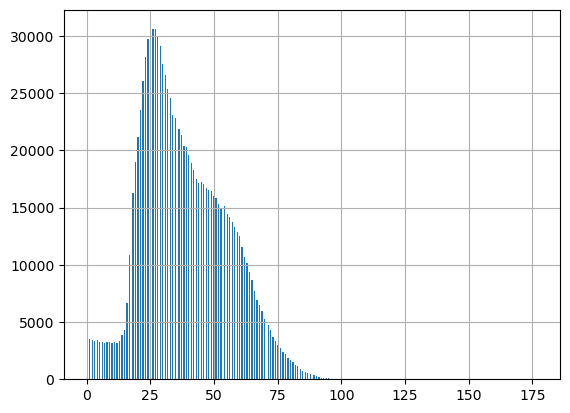

In [146]:
cln_people['AGE'].hist(bins='auto');

In [147]:
cln_people['AGE'].fillna(cln_people['AGE'].median(), inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [148]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


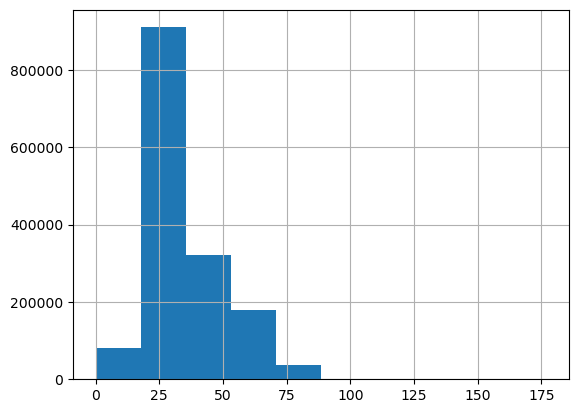

In [149]:
cln_people['AGE'].hist();

In [150]:
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              741510
USAGE UNKNOWN                                 699868
NONE PRESENT                                   47896
SAFETY BELT NOT USED                            8625
CHILD RESTRAINT USED                            7821
HELMET NOT USED                                 6525
CHILD RESTRAINT - FORWARD FACING                3409
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2457
CHILD RESTRAINT - TYPE UNKNOWN                  1718
CHILD RESTRAINT - REAR FACING                   1610
HELMET USED                                     1358
DOT COMPLIANT MOTORCYCLE HELMET                  974
BOOSTER SEAT                                     913
CHILD RESTRAINT NOT USED                         668
SHOULD/LAP BELT USED IMPROPERLY                  190
NOT DOT COMPLIANT MOTORCYCLE HELMET              186
WHEELCHAIR                                       163
CHILD RESTRAINT USED IMPROPERLY                  107
STRETCHER                                     

In [151]:
sf_equip = ['SAFETY BELT USED', 'CHILD RESTRAINT USED', 'CHILD RESTRAINT - FORWARD FACING', 
            'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 'CHILD RESTRAINT - TYPE UNKNOWN',
           'CHILD RESTRAINT - REAR FACING', 'HELMET USED', 'DOT COMPLIANT MOTORCYCLE HELMET',
           'BOOSTER SEAT', 'WHEELCHAIR', 'STRETCHER']

f1 = (lambda x: 'SAFETY EQUIPMENT USED' if x in sf_equip 
      else ('USAGE UNKNOWN' if x =='USAGE UNKNOWN' else 'SAFETY EQUIPMENT MISSING/MISUSED'))

In [152]:
cln_people['SAFETY_EQUIPMENT'] = cln_people['SAFETY_EQUIPMENT'].map(f1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY EQUIPMENT USED               761963
USAGE UNKNOWN                       699868
SAFETY EQUIPMENT MISSING/MISUSED     68554
Name: SAFETY_EQUIPMENT, dtype: int64

In [154]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [155]:
cln_people['INJURY_CLASSIFICATION'].fillna('NO INDICATION OF INJURY',inplace=True)

In [156]:
cln_people['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1400611
NONINCAPACITATING INJURY      73185
REPORTED, NOT EVIDENT         41738
INCAPACITATING INJURY         14003
FATAL                           848
Name: INJURY_CLASSIFICATION, dtype: int64

In [157]:
cln_people['DRIVER_ACTION'].value_counts()

NONE                                 438974
UNKNOWN                              301595
FAILED TO YIELD                      110980
OTHER                                107701
FOLLOWED TOO CLOSELY                  74349
IMPROPER BACKING                      37076
IMPROPER TURN                         31917
IMPROPER LANE CHANGE                  31451
IMPROPER PASSING                      27025
DISREGARDED CONTROL DEVICES           21109
TOO FAST FOR CONDITIONS               18947
WRONG WAY/SIDE                         4794
IMPROPER PARKING                       4556
OVERCORRECTED                          1955
EVADING POLICE VEHICLE                 1940
CELL PHONE USE OTHER THAN TEXTING      1867
EMERGENCY VEHICLE ON CALL              1110
TEXTING                                 504
STOPPED SCHOOL BUS                      145
LICENSE RESTRICTIONS                     52
Name: DRIVER_ACTION, dtype: int64

In [158]:
cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_ACTION'].fillna('UNKNOWN',inplace=True)



In [159]:
cln_people['DRIVER_ACTION'].fillna('NOT A DRIVER',inplace=True)

In [160]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [161]:
cln_people['DRIVER_VISION'].value_counts()

NOT OBSCURED              632631
UNKNOWN                   554663
OTHER                      12394
MOVING VEHICLES             7183
PARKED VEHICLES             4415
WINDSHIELD (WATER/ICE)      3476
BLINDED - SUNLIGHT          1451
TREES, PLANTS                535
BUILDINGS                    442
BLINDED - HEADLIGHTS         120
HILLCREST                     93
BLOWING MATERIALS             88
EMBANKMENT                    77
SIGNBOARD                     33
Name: DRIVER_VISION, dtype: int64

In [162]:
cln_people['DRIVER_VISION'].replace(['MOVING VEHICLES',
                                    'PARKED VEHICLES',
                                    'WINDSHIELD (WATER/ICE)',
                                    'BLINDED - SUNLIGHT',
                                    'TREES, PLANTS',
                                    'BUILDINGS',
                                    'BLINDED - HEADLIGHTS',
                                    'HILLCREST',
                                    'BLOWING MATERIALS',
                                    'EMBANKMENT',
                                    'SIGNBOARD'], 'OBSCURED', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [163]:
cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_VISION'].fillna('UNKNOWN',inplace=True)



In [164]:
cln_people['DRIVER_VISION'].fillna('NOT A DRIVER',inplace=True)

In [165]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1530385 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [166]:
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL                          801930
UNKNOWN                         394225
IMPAIRED - ALCOHOL                5489
REMOVED BY EMS                    4515
OTHER                             3579
FATIGUED/ASLEEP                   3260
EMOTIONAL                         2710
ILLNESS/FAINTED                   1138
HAD BEEN DRINKING                  929
IMPAIRED - DRUGS                   644
IMPAIRED - ALCOHOL AND DRUGS       331
MEDICATED                          153
Name: PHYSICAL_CONDITION, dtype: int64

In [167]:
cln_people['PHYSICAL_CONDITION'].replace(['IMPAIRED - ALCOHOL',
                                    'REMOVED BY EMS',
                                    'FATIGUED/ASLEEP',
                                    'EMOTIONAL',
                                    'ILLNESS/FAINTED',
                                    'HAD BEEN DRINKING',
                                    'IMPAIRED - DRUGS',
                                    'IMPAIRED - ALCOHOL AND DRUGS',
                                    'MEDICATED'], 'IMPAIRED', inplace=True)

In [168]:
cln_people['PHYSICAL_CONDITION'].fillna('UNKNOWN', inplace=True)

In [169]:
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL      801930
UNKNOWN     705707
IMPAIRED     19169
OTHER         3579
Name: PHYSICAL_CONDITION, dtype: int64

In [170]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1530385 non-null  object 
 8   PHYSICAL_CONDITION     1530385 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [171]:
cln_people['PEDPEDAL_ACTION'].value_counts()

CROSSING - WITH SIGNAL                               5861
WITH TRAFFIC                                         4420
UNKNOWN/NA                                           3698
OTHER ACTION                                         3456
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         1682
NO ACTION                                            1508
CROSSING - NO CONTROLS (AT INTERSECTION)             1422
CROSSING - AGAINST SIGNAL                            1361
NOT AT INTERSECTION                                  1005
AGAINST TRAFFIC                                       874
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     826
STANDING IN ROADWAY                                   674
TURNING LEFT                                          390
PARKED VEHICLE                                        326
ENTER FROM DRIVE/ALLEY                                275
WORKING IN ROADWAY                                    196
TURNING RIGHT                                         177
INTOXICATED PE

In [172]:
cln_people['PEDPEDAL_ACTION'].fillna('NOT A PEDPEDAL', inplace=True)

In [173]:
cln_people['PEDPEDAL_VISIBILITY'].value_counts()

NO CONTRASTING CLOTHING    22345
CONTRASTING CLOTHING        3753
OTHER LIGHT SOURCE USED     1635
REFLECTIVE MATERIAL          713
Name: PEDPEDAL_VISIBILITY, dtype: int64

In [174]:
cln_people['PEDPEDAL_VISIBILITY'].fillna('NOT A PEDPEDAL', inplace=True)

In [175]:
cln_people['PEDPEDAL_LOCATION'].value_counts()

IN ROADWAY         12781
IN CROSSWALK        9487
UNKNOWN/NA          2375
NOT IN ROADWAY      1273
BIKEWAY             1227
BIKE LANE            794
DRIVEWAY ACCESS      416
SHOULDER             146
Name: PEDPEDAL_LOCATION, dtype: int64

In [176]:
cln_people['PEDPEDAL_LOCATION'].fillna('NOT A PEDPEDAL', inplace=True)

In [177]:
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.33     15
0.04     15
0.05     11
0.32      9
0.35      9
0.02      8
0.31      8
0.06      8
0.38      6
0.36      4
0.34      4
0.39      3
0.44      3
0.01      3
1.00      2
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0.40      1
0.47      1
0.99      1
0.41      1
0.80      1
0.58      1
0.37      1
0.85      1
0.67      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

BAC 0.30% to 0.40%: In this percentage range, you'll likely have alcohol poisoning, a potentially life-threatening condition, and experience loss of consciousness. BAC Over 0.40%: This is a potentially fatal blood alcohol level.

In [178]:
cln_people.drop((cln_people[cln_people['BAC_RESULT VALUE']>0.40].index),inplace=True) 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [179]:
cln_people['BAC_RESULT VALUE']=cln_people['BAC_RESULT VALUE'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.04     15
0.33     15
0.05     11
0.35      9
0.32      9
0.31      8
0.06      8
0.02      8
0.38      6
0.34      4
0.36      4
0.39      3
0.01      3
0.37      1
0.40      1
Name: BAC_RESULT VALUE, dtype: int64

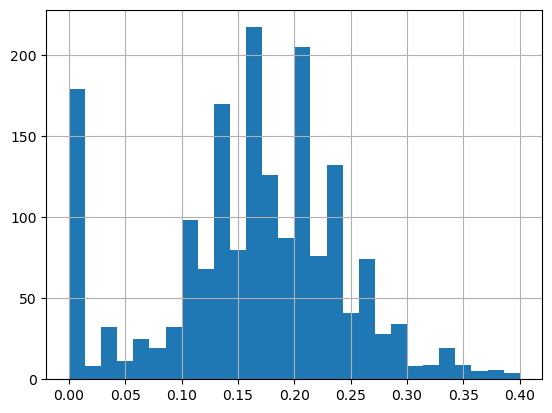

In [181]:
cln_people['BAC_RESULT VALUE'].hist(bins='auto');

In [182]:
cln_people['BAC_RESULT VALUE'].fillna(0,inplace=True)

In [183]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530363 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530363 non-null  object 
 1   CRASH_RECORD_ID        1530363 non-null  object 
 2   VEHICLE_ID             1500289 non-null  float64
 3   AGE                    1530363 non-null  float64
 4   SAFETY_EQUIPMENT       1530363 non-null  object 
 5   INJURY_CLASSIFICATION  1530363 non-null  object 
 6   DRIVER_ACTION          1530363 non-null  object 
 7   DRIVER_VISION          1530363 non-null  object 
 8   PHYSICAL_CONDITION     1530363 non-null  object 
 9   PEDPEDAL_ACTION        1530363 non-null  object 
 10  PEDPEDAL_VISIBILITY    1530363 non-null  object 
 11  PEDPEDAL_LOCATION      1530363 non-null  object 
 12  BAC_RESULT VALUE       1530363 non-null  float64
dtypes: float64(3), object(10)
memory usage: 163.5+ MB


In [184]:
veh_crsh_ppl = pd.merge(veh_crsh, cln_people, how='inner', on='CRASH_RECORD_ID' )

In [185]:
veh_crsh_ppl.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT VALUE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,56.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0


In [186]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [187]:
veh_crsh_ppl['VEHICLE_TYPE'].value_counts()

PASSENGER                                 572702
SPORT UTILITY VEHICLE (SUV)               110811
VAN/MINI-VAN                               40232
UNKNOWN/NA                                 39279
PICKUP                                     25734
TRUCK - SINGLE UNIT                        10077
BUS OVER 15 PASS.                           8269
OTHER                                       6906
TRACTOR W/ SEMI-TRAILER                     5071
MOTORCYCLE (OVER 150CC)                     3824
BUS UP TO 15 PASS.                          1068
SINGLE UNIT TRUCK WITH TRAILER               932
TRACTOR W/O SEMI-TRAILER                     826
OTHER VEHICLE WITH TRAILER                   628
MOPED OR MOTORIZED BICYCLE                   501
MOTOR DRIVEN CYCLE                           200
ALL-TERRAIN VEHICLE (ATV)                    174
AUTOCYCLE                                    112
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          51
FARM EQUIPMENT                                28
RECREATIONAL OFF-HIG

In [188]:
veh_crsh_ppl.drop(['VEHICLE_CONFIG'],axis=1,inplace=True)

In [189]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [190]:
veh_crsh_ppl.drop(columns=['VEHICLE_ID_x','VEHICLE_ID_y'], axis=1, inplace=True)

In [191]:
veh_crsh_ppl.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT VALUE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,56.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0


In [192]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [193]:
veh_crsh_ppl.drop(columns=['TRAILER1_LENGTH','TRAILER2_LENGTH', 'TRAILER2_I'], axis=1, inplace=True)

In [194]:
veh_crsh_ppl.columns

Index(['CRASH_RECORD_ID', 'CRASH_YEAR', 'POSTED_SPEED_LIMIT',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER',
       'WIDE_LOAD_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I',
       'CARGO_BODY_TYPE', 'TRAILER1_I', 'PERSON_TYPE', 'AGE',
       'SAFETY_EQUIPMENT', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION',
       'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT VALUE'],
      dtype='object')

In [195]:
veh_crsh_ppl.drop(columns=['PEDPEDAL_ACTION'], axis=1, inplace=True)

### Saving Preprocessed in CSV 

In [196]:
cln_crashes.to_csv('Crashes.csv', index = False)
cln_veh.to_csv('Vehicle.csv', index = False)
cln_people.to_csv('People.csv', index = False)



veh_crsh_ppl.to_csv('Vehicle_Crash_People.csv', index = False)
veh_crsh.to_csv('Vehicle_Crash.csv', index = False)

### Loading Preprocessed Data 

In [197]:
import pandas as pd
# cln_crashes = pd.read_csv('preprocessed/Crashes.csv')
# cln_veh     = pd.read_csv('preprocessed/Vehicle.csv')
# cln_people  = pd.read_csv('preprocessed/People.csv')



veh_crsh_ppl = pd.read_csv('/kaggle/input/chicago-car-crash-report/Vehicle_Crash_People.csv')
# veh_crsh     = pd.read_csv('preprocessed/Vehicle_Crash.csv')

### Data Processing

In [198]:
veh_crsh_ppl.set_index('CRASH_RECORD_ID',inplace=True)

In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

In [200]:
X = veh_crsh_ppl.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = veh_crsh_ppl['PRIM_CONTRIBUTORY_CAUSE']

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(splitter.split(X, y))

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [201]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661960 entries, 626ae4aadfc657dac559c2c6e5334566e402116d0ca9ea92d708d7c5c70f8cc4b23a00ea58e46a5b9436d81bf290b853d6fefd0a676f9dcda1278546f45c7b97 to 8d34703bca6e8d34703600b0c203873f853b8213dea22d5eef9985e105df402f5895490802b5552d637b5ea5ba04e03355457bd77857961024abd3a617374dd8
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRASH_YEAR              661960 non-null  int64  
 1   POSTED_SPEED_LIMIT      661960 non-null  int64  
 2   DEVICE_CONDITION        661960 non-null  object 
 3   WEATHER_CONDITION       661960 non-null  object 
 4   LIGHTING_CONDITION      661960 non-null  object 
 5   CRASH_TYPE              661960 non-null  object 
 6   INTERSECTION_RELATED_I  661960 non-null  object 
 7   ROAD_DEFECT             661960 non-null  object 
 8   NUM_UNITS               661960 non-null  int64  
 9   WORK_ZONE_I             661960 non-null  objec

In [202]:
# Select only integer columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Get the integer index positions of the columns
cat_indices = [X_train.columns.get_loc(col) for col in cat_cols]

In [203]:
from imblearn.under_sampling import RandomUnderSampler

In [204]:
print('Before Random Undersampling:', Counter(y_train))

Before Random Undersampling: Counter({'FAILING TO YIELD RIGHT-OF-WAY': 113470, 'RECKLESS/IMPROPER DRIVING': 103236, 'UNABLE TO DETERMINE': 101175, 'NOT APPLICABLE': 84205, 'TRAFFIC RULES VIOLATED': 76742, 'FAILING TO REDUCE SPEED TO AVOID CRASH': 57990, 'FOLLOWING TOO CLOSELY': 57862, 'COMPROMISED DRIVING': 41438, "NATURE'S IMPACT": 12042, 'OBSTRUCTIONS': 8945, 'OVERSPEEDING': 4855})


In [205]:
print('Before Random Undersampling:', Counter(X_train))

Before Random Undersampling: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'CRASH_TYPE': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'VEHICLE_DEFECT': 1, 'VEHICLE_TYPE': 1, 'VEHICLE_USE': 1, 'MANEUVER': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'CARGO_BODY_TYPE': 1, 'TRAILER1_I': 1, 'PERSON_TYPE': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'DRIVER_ACTION': 1, 'DRIVER_VISION': 1, 'PHYSICAL_CONDITION': 1, 'PEDPEDAL_VISIBILITY': 1, 'PEDPEDAL_LOCATION': 1, 'BAC_RESULT VALUE': 1})


In [206]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)


In [207]:
# Count the number of samples in each class after undersampling
print('After Random Undersampling:', Counter(y_train_resampled2))

After Random Undersampling: Counter({'COMPROMISED DRIVING': 4855, 'FAILING TO REDUCE SPEED TO AVOID CRASH': 4855, 'FAILING TO YIELD RIGHT-OF-WAY': 4855, 'FOLLOWING TOO CLOSELY': 4855, "NATURE'S IMPACT": 4855, 'NOT APPLICABLE': 4855, 'OBSTRUCTIONS': 4855, 'OVERSPEEDING': 4855, 'RECKLESS/IMPROPER DRIVING': 4855, 'TRAFFIC RULES VIOLATED': 4855, 'UNABLE TO DETERMINE': 4855})


In [208]:
print('Before Random Undersampling:', Counter(X_train_resampled2))

Before Random Undersampling: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'CRASH_TYPE': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'VEHICLE_DEFECT': 1, 'VEHICLE_TYPE': 1, 'VEHICLE_USE': 1, 'MANEUVER': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'CARGO_BODY_TYPE': 1, 'TRAILER1_I': 1, 'PERSON_TYPE': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'DRIVER_ACTION': 1, 'DRIVER_VISION': 1, 'PHYSICAL_CONDITION': 1, 'PEDPEDAL_VISIBILITY': 1, 'PEDPEDAL_LOCATION': 1, 'BAC_RESULT VALUE': 1})


In [209]:
X_train['DEVICE_CONDITION'].value_counts()

FUNCTIONING PROPERLY        321918
NO CONTROLS                 296499
NOT FUNCTIONING PROPERLY     43543
Name: DEVICE_CONDITION, dtype: int64

In [210]:
X_train_resampled2['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 24968
FUNCTIONING PROPERLY        24909
NOT FUNCTIONING PROPERLY     3528
Name: DEVICE_CONDITION, dtype: int64

In [211]:
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [212]:
# X_resampled['INJURY_CLASSIFICATION'].value_counts()

In [213]:
X_train.select_dtypes(include=['object']).columns

Index(['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'ROAD_DEFECT', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'WIDE_LOAD_I', 'EXCEED_SPEED_LIMIT_I', 'CARGO_BODY_TYPE',
       'TRAILER1_I', 'PERSON_TYPE', 'SAFETY_EQUIPMENT',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION'],
      dtype='object')

In [214]:
np.array(cat_cols)

array(['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'ROAD_DEFECT',
       'WORK_ZONE_I', 'WORKERS_PRESENT_I', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'WIDE_LOAD_I',
       'EXCEED_SPEED_LIMIT_I', 'CARGO_BODY_TYPE', 'TRAILER1_I',
       'PERSON_TYPE', 'SAFETY_EQUIPMENT', 'INJURY_CLASSIFICATION',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION'], dtype=object)

In [215]:
X_train_resampled_ohe = pd.get_dummies(X_train_resampled2[np.array(cat_cols)])
X_test_ohe = pd.get_dummies(X_test[np.array(cat_cols)])

X_train_resampled_ohe

,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING PROPERLY,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_NOT CLEAR,LIGHTING_CONDITION_DAY TIME,LIGHTING_CONDITION_NIGHT TIME,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,INTERSECTION_RELATED_I_N,INTERSECTION_RELATED_I_Y,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
53401,1,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
53402,1,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
53403,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [216]:
X_train_knn = pd.concat([X_train_resampled2, X_train_resampled_ohe], axis=1)
X_test_knn = pd.concat([X_test, X_test_ohe], axis=1)

X_train_knn

,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,NUM_UNITS,WORK_ZONE_I,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,2022,20,NO CONTROLS,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
1,2023,30,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
2,2022,30,NO CONTROLS,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,3,N,...,0,0,0,0,0,0,1,0,0,0
3,2021,30,FUNCTIONING PROPERLY,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
4,2018,30,NO CONTROLS,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,4,N,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400,2020,30,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,3,N,...,0,0,0,0,0,0,1,0,0,0
53401,2020,30,FUNCTIONING PROPERLY,NOT CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
53402,2018,30,FUNCTIONING PROPERLY,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,0,0,0,1
53403,2018,35,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,6,N,...,0,0,0,0,0,0,1,0,0,0


In [217]:
X_train_knn_dr = X_train_knn.drop(np.array(cat_cols),axis=1)
X_test_knn_dr = X_test_knn.drop(np.array(cat_cols),axis=1)

In [218]:
X_train_knn_dr.head()

,CRASH_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,2022,20,2,0.0,0.0,1,7,4,41.677975,-87.618833,...,0,0,0,0,0,0,1,0,0,0
1,2023,30,2,0.0,0.0,14,6,2,41.848770,-87.666122,...,0,0,0,0,0,0,1,0,0,0
2,2022,30,3,1.0,0.0,8,2,1,41.822838,-87.689874,...,0,0,0,0,0,0,1,0,0,0
3,2021,30,2,1.0,0.0,11,6,10,41.813970,-87.664961,...,0,0,0,0,0,0,1,0,0,0
4,2018,30,4,0.0,0.0,17,4,12,41.962319,-87.760971,...,0,0,0,0,0,0,1,0,0,0


In [219]:
X_test_knn_dr.head()

,CRASH_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
5407b3bcd5f897ca66e2af559afe52db5556e7af2e7d9c8aa100119fba1274bfff782e1ff6ab8a454f397314e9df7ef391fd1fde4d088e4bfa3bbe8608fc6efe,2019,30,6,2.0,0.0,17,1,6,41.778405,-87.735109,...,0,0,0,0,0,0,1,0,0,0
cdf0083775d3b06035d951614aee22be5bf1c393ecc793fbdec43913860cf15c1ab784aa727f0880815ea5b456d33ee82363788a8daa8a34ffde339a4c34bbba,2018,30,2,1.0,0.0,11,2,12,41.808512,-87.665117,...,0,0,0,0,1,0,0,0,0,0
2e76a002809b2cdbfd666a4bcca7e4df087410f92300151b5afd3e94b83ad33b59a361ee3c6a4352f64b571914b464a65cd055511f7274c4ebf8722d65960844,2022,30,2,2.0,0.0,0,1,6,41.735808,-87.654401,...,0,0,0,0,0,0,1,0,0,0
85d67d6e301fe00f29f7e1f74e46affa5b9e98f794e3e30a1e8b4ee4351aec25eae1c760dd9fe2eed0a561065b5639dea40b57d5087a1e57619c93fc9045982c,2020,30,1,0.0,0.0,21,7,6,41.882302,-87.679252,...,0,0,0,0,0,0,1,0,0,0
58ca8955d063939cb6b13da051892586f9088f3ca5baec65ebeaad2673a03ae2753fbe65a37cf6ea21f867dcd6842f4c0450c74528b4f0cbea4978697edabcd0,2020,30,3,0.0,0.0,17,3,12,41.745928,-87.585995,...,0,0,0,0,0,0,1,0,0,0


In [220]:
for col in X_test_knn_dr.columns:
    if col not in  X_train_knn_dr.columns:
        print(col)

### Data Preprocessing ( ML )

In [221]:
import pandas as pd

In [222]:
veh_crsh_ppl = pd.read_csv("/kaggle/input/chicago-car-crash-report/Vehicle_Crash_People.csv")

In [223]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827451 entries, 0 to 827450
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [224]:
# Finding Category Columns
cat_columns = veh_crsh_ppl.dtypes[veh_crsh_ppl.dtypes == 'object'].index

# Finding unique counts for categorical columns 
veh_crsh_ppl[cat_columns].nunique()

CRASH_RECORD_ID            158170
DEVICE_CONDITION                3
WEATHER_CONDITION               2
LIGHTING_CONDITION              2
CRASH_TYPE                      1
INTERSECTION_RELATED_I          2
ROAD_DEFECT                     2
PRIM_CONTRIBUTORY_CAUSE        11
WORK_ZONE_I                     2
WORKERS_PRESENT_I               2
VEHICLE_DEFECT                 17
VEHICLE_TYPE                   21
VEHICLE_USE                    24
MANEUVER                       28
WIDE_LOAD_I                     2
EXCEED_SPEED_LIMIT_I            2
CARGO_BODY_TYPE                10
TRAILER1_I                      2
PERSON_TYPE                     6
SAFETY_EQUIPMENT                3
INJURY_CLASSIFICATION           5
DRIVER_ACTION                  21
DRIVER_VISION                   5
PHYSICAL_CONDITION              4
PEDPEDAL_VISIBILITY             5
PEDPEDAL_LOCATION               9
dtype: int64

#### Visiting Each categorical columns

##### DEVICE_CONDITION               

In [225]:
veh_crsh_ppl["DEVICE_CONDITION"].value_counts()

FUNCTIONING PROPERLY        402717
NO CONTROLS                 370421
NOT FUNCTIONING PROPERLY     54313
Name: DEVICE_CONDITION, dtype: int64

In [226]:
spiral_encoding = {'FUNCTIONING PROPERLY':2, 'NOT FUNCTIONING PROPERLY':1, 'NO CONTROLS':0 }

veh_crsh_ppl['DEVICE_CONDITION'] = veh_crsh_ppl['DEVICE_CONDITION'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['DEVICE_CONDITION'].unique()

array([2, 1, 0])

##### WEATHER_CONDITION

In [227]:
veh_crsh_ppl["WEATHER_CONDITION"].value_counts()

CLEAR        658321
NOT CLEAR    169130
Name: WEATHER_CONDITION, dtype: int64

In [228]:
spiral_encoding = {'CLEAR':1, 'NOT CLEAR':0 }

veh_crsh_ppl['WEATHER_CONDITION'] = veh_crsh_ppl['WEATHER_CONDITION'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['WEATHER_CONDITION'].unique()

array([1, 0])

##### LIGHTING_CONDITION              

In [229]:
veh_crsh_ppl["LIGHTING_CONDITION"].value_counts()

DAY TIME      521164
NIGHT TIME    306287
Name: LIGHTING_CONDITION, dtype: int64

In [230]:
spiral_encoding = {'DAY TIME':1, 'NIGHT TIME':0 }

veh_crsh_ppl['LIGHTING_CONDITION'] = veh_crsh_ppl['LIGHTING_CONDITION'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['LIGHTING_CONDITION'].unique()

array([1, 0])

##### CRASH_TYPE                      

In [231]:
veh_crsh_ppl.drop('CRASH_TYPE', axis= 1, inplace= True)

##### INTERSECTION_RELATED_I

In [232]:
veh_crsh_ppl['INTERSECTION_RELATED_I'].value_counts()

N    483934
Y    343517
Name: INTERSECTION_RELATED_I, dtype: int64

In [233]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['INTERSECTION_RELATED_I'] = veh_crsh_ppl['INTERSECTION_RELATED_I'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['INTERSECTION_RELATED_I'].unique()

array([1, 0])

##### ROAD_DEFECT                     

In [234]:
veh_crsh_ppl["ROAD_DEFECT"].value_counts()

NO DEFECTS    707726
DEFECTS       119725
Name: ROAD_DEFECT, dtype: int64

In [235]:
spiral_encoding = {'NO DEFECTS':1, 'DEFECTS':0 }

veh_crsh_ppl['ROAD_DEFECT'] = veh_crsh_ppl['ROAD_DEFECT'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['ROAD_DEFECT'].unique()

array([1, 0])

##### PRIM_CONTRIBUTORY_CAUSE ( Y Output)

In [236]:
veh_crsh_ppl["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

FAILING TO YIELD RIGHT-OF-WAY             141838
RECKLESS/IMPROPER DRIVING                 129045
UNABLE TO DETERMINE                       126469
NOT APPLICABLE                            105256
TRAFFIC RULES VIOLATED                     95927
FAILING TO REDUCE SPEED TO AVOID CRASH     72488
FOLLOWING TOO CLOSELY                      72327
COMPROMISED DRIVING                        51798
NATURE'S IMPACT                            15053
OBSTRUCTIONS                               11181
OVERSPEEDING                                6069
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [237]:
label_encoding = veh_crsh_ppl["PRIM_CONTRIBUTORY_CAUSE"].unique()
label_encoding = { label_encoding[i] : i for i in range(len(label_encoding))}

veh_crsh_ppl["PRIM_CONTRIBUTORY_CAUSE"] = veh_crsh_ppl["PRIM_CONTRIBUTORY_CAUSE"].apply(lambda x : label_encoding[x])
veh_crsh_ppl["PRIM_CONTRIBUTORY_CAUSE"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

##### WORKERS_PRESENT_I               

In [238]:
veh_crsh_ppl["WORKERS_PRESENT_I"].value_counts()

N    826406
Y      1045
Name: WORKERS_PRESENT_I, dtype: int64

In [239]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['WORKERS_PRESENT_I'] = veh_crsh_ppl['WORKERS_PRESENT_I'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['WORKERS_PRESENT_I'].unique()

array([0, 1])

##### VEHICLE_DEFECT                 

In [240]:
veh_crsh_ppl["VEHICLE_DEFECT"].value_counts()

NONE                438597
UNKNOWN             378285
BRAKES                4646
OTHER                 3335
TIRES                  777
STEERING               712
WHEELS                 409
SUSPENSION             260
ENGINE/MOTOR           193
LIGHTS                  51
WINDOWS                 50
FUEL SYSTEM             48
CARGO                   32
SIGNALS                 26
EXHAUST                 19
RESTRAINT SYSTEM         7
TRAILER COUPLING         4
Name: VEHICLE_DEFECT, dtype: int64

In [241]:
vehicle_defect = pd.get_dummies(veh_crsh_ppl["VEHICLE_DEFECT"])

vehicle_defect["VEHICLE_DEFECT_OTHER"] = vehicle_defect["OTHER"]
vehicle_defect["VEHICLE_DEFECT_UNKNOWN"] = vehicle_defect["UNKNOWN"]
vehicle_defect["VEHICLE_DEFECT_NONE"] = vehicle_defect["NONE"]

vehicle_defect.drop(["OTHER","UNKNOWN","NONE"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,vehicle_defect), axis = 1)
vehicle_defect.head()

,BRAKES,CARGO,ENGINE/MOTOR,EXHAUST,FUEL SYSTEM,LIGHTS,RESTRAINT SYSTEM,SIGNALS,STEERING,SUSPENSION,TIRES,TRAILER COUPLING,WHEELS,WINDOWS,VEHICLE_DEFECT_OTHER,VEHICLE_DEFECT_UNKNOWN,VEHICLE_DEFECT_NONE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


##### WORK_ZONE_I                     

In [242]:
veh_crsh_ppl["WORK_ZONE_I"].value_counts()

N    824018
Y      3433
Name: WORK_ZONE_I, dtype: int64

In [243]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['WORK_ZONE_I'] = veh_crsh_ppl['WORK_ZONE_I'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['WORK_ZONE_I'].unique()

array([0, 1])

##### VEHICLE_TYPE                   

In [244]:
veh_crsh_ppl["VEHICLE_TYPE"].value_counts()

PASSENGER                                 572702
SPORT UTILITY VEHICLE (SUV)               110811
VAN/MINI-VAN                               40232
UNKNOWN/NA                                 39279
PICKUP                                     25734
TRUCK - SINGLE UNIT                        10077
BUS OVER 15 PASS.                           8269
OTHER                                       6906
TRACTOR W/ SEMI-TRAILER                     5071
MOTORCYCLE (OVER 150CC)                     3824
BUS UP TO 15 PASS.                          1068
SINGLE UNIT TRUCK WITH TRAILER               932
TRACTOR W/O SEMI-TRAILER                     826
OTHER VEHICLE WITH TRAILER                   628
MOPED OR MOTORIZED BICYCLE                   501
MOTOR DRIVEN CYCLE                           200
ALL-TERRAIN VEHICLE (ATV)                    174
AUTOCYCLE                                    112
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          51
FARM EQUIPMENT                                28
RECREATIONAL OFF-HIG

In [245]:
vehicle_type = pd.get_dummies(veh_crsh_ppl["VEHICLE_TYPE"])

vehicle_type["VEHICLE_TYPE_OTHER"] = vehicle_type["OTHER"]
vehicle_type["VEHICLE_TYPE_UNKNOWN/NA"] = vehicle_type["UNKNOWN/NA"]
vehicle_type["VEHICLE_TYPE_PASSENGER"] = vehicle_type["PASSENGER"]

vehicle_type.drop(["OTHER","UNKNOWN/NA","PASSENGER"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,vehicle_type), axis = 1)
vehicle_type.head()

,3-WHEELED MOTORCYCLE (2 REAR WHEELS),ALL-TERRAIN VEHICLE (ATV),AUTOCYCLE,BUS OVER 15 PASS.,BUS UP TO 15 PASS.,FARM EQUIPMENT,MOPED OR MOTORIZED BICYCLE,MOTOR DRIVEN CYCLE,MOTORCYCLE (OVER 150CC),OTHER VEHICLE WITH TRAILER,...,RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),SINGLE UNIT TRUCK WITH TRAILER,SPORT UTILITY VEHICLE (SUV),TRACTOR W/ SEMI-TRAILER,TRACTOR W/O SEMI-TRAILER,TRUCK - SINGLE UNIT,VAN/MINI-VAN,VEHICLE_TYPE_OTHER,VEHICLE_TYPE_UNKNOWN/NA,VEHICLE_TYPE_PASSENGER
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### VEHICLE_USE

In [246]:
veh_crsh_ppl["VEHICLE_USE"].value_counts()

PERSONAL                    617280
UNKNOWN/NA                  111806
NOT IN USE                   30849
OTHER                        18391
RIDESHARE SERVICE             9958
POLICE                        7115
COMMERCIAL - SINGLE UNIT      6653
TAXI/FOR HIRE                 6483
CTA                           6264
CONSTRUCTION/MAINTENANCE      2841
COMMERCIAL - MULTI-UNIT       2086
SCHOOL BUS                    1803
TOW TRUCK                     1684
OTHER TRANSIT                 1124
AMBULANCE                      819
FIRE                           636
DRIVER EDUCATION               499
STATE OWNED                    430
MASS TRANSIT                   333
LAWN CARE/LANDSCAPING          291
AGRICULTURE                     58
CAMPER/RV - SINGLE UNIT         26
MILITARY                        16
HOUSE TRAILER                    6
Name: VEHICLE_USE, dtype: int64

In [247]:
vehicle_use = pd.get_dummies(veh_crsh_ppl["VEHICLE_USE"])

vehicle_use["VEHICLE_USE_OTHER"] = vehicle_use["OTHER"]
vehicle_use["VEHICLE_USE_UNKNOWN/NA"] = vehicle_use["UNKNOWN/NA"]

vehicle_use.drop(["OTHER","UNKNOWN/NA"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,vehicle_use), axis = 1)
vehicle_use.head()

,AGRICULTURE,AMBULANCE,CAMPER/RV - SINGLE UNIT,COMMERCIAL - MULTI-UNIT,COMMERCIAL - SINGLE UNIT,CONSTRUCTION/MAINTENANCE,CTA,DRIVER EDUCATION,FIRE,HOUSE TRAILER,...,OTHER TRANSIT,PERSONAL,POLICE,RIDESHARE SERVICE,SCHOOL BUS,STATE OWNED,TAXI/FOR HIRE,TOW TRUCK,VEHICLE_USE_OTHER,VEHICLE_USE_UNKNOWN/NA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


##### MANEUVER

In [248]:
veh_crsh_ppl["MANEUVER"].value_counts()

STRAIGHT AHEAD                        473050
TURNING LEFT                           76964
PARKED                                 70838
SLOW/STOP IN TRAFFIC                   64050
UNKNOWN/NA                             34130
TURNING RIGHT                          23266
PASSING/OVERTAKING                     13495
OTHER                                  12826
CHANGING LANES                          8624
U-TURN                                  6388
BACKING                                 6189
ENTERING TRAFFIC LANE FROM PARKING      5659
SKIDDING/CONTROL LOSS                   5318
AVOIDING VEHICLES/OBJECTS               5144
STARTING IN TRAFFIC                     5108
MERGING                                 3146
ENTER FROM DRIVE/ALLEY                  2839
DRIVING WRONG WAY                       2444
NEGOTIATING A CURVE                     1591
PARKED IN TRAFFIC LANE                  1569
SLOW/STOP - LEFT TURN                   1566
LEAVING TRAFFIC LANE TO PARK            1079
SLOW/STOP 

In [249]:
maneuver = pd.get_dummies(veh_crsh_ppl["MANEUVER"])

maneuver["MANEUVER_OTHER"] = maneuver["OTHER"]
maneuver["MANEUVER_UNKNOWN/NA"] = maneuver["UNKNOWN/NA"]

maneuver.drop(["OTHER","UNKNOWN/NA"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,maneuver), axis = 1)
maneuver.head()

,AVOIDING VEHICLES/OBJECTS,BACKING,CHANGING LANES,DISABLED,DIVERGING,DRIVERLESS,DRIVING WRONG WAY,ENTER FROM DRIVE/ALLEY,ENTERING TRAFFIC LANE FROM PARKING,LEAVING TRAFFIC LANE TO PARK,...,SLOW/STOP - RIGHT TURN,SLOW/STOP IN TRAFFIC,STARTING IN TRAFFIC,STRAIGHT AHEAD,TURNING LEFT,TURNING ON RED,TURNING RIGHT,U-TURN,MANEUVER_OTHER,MANEUVER_UNKNOWN/NA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


##### WIDE_LOAD_I                     

In [250]:
veh_crsh_ppl["WIDE_LOAD_I"].value_counts()

N    827413
Y        38
Name: WIDE_LOAD_I, dtype: int64

In [251]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['WIDE_LOAD_I'] = veh_crsh_ppl['WIDE_LOAD_I'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['WIDE_LOAD_I'].unique()

array([0, 1])

##### EXCEED_SPEED_LIMIT_I            

In [252]:
veh_crsh_ppl["EXCEED_SPEED_LIMIT_I"].value_counts()

N    825590
Y      1861
Name: EXCEED_SPEED_LIMIT_I, dtype: int64

In [253]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['EXCEED_SPEED_LIMIT_I'] = veh_crsh_ppl['EXCEED_SPEED_LIMIT_I'].apply(lambda x : spiral_encoding[x])

veh_crsh_ppl['EXCEED_SPEED_LIMIT_I'].unique()

array([0, 1])

##### CARGO_BODY_TYPE 

In [254]:
veh_crsh_ppl["CARGO_BODY_TYPE"].value_counts()

NO CARGO            821688
VAN/ENCLOSED BOX      2217
OTHER                 1250
BUS                   1209
FLATBED                413
GARBAGE/REFUSE         209
DUMP                   207
TANK                   171
CONCRETE MIXER          54
AUTO TRANSPORTER        33
Name: CARGO_BODY_TYPE, dtype: int64

In [255]:
cargo_body_type = pd.get_dummies(veh_crsh_ppl['CARGO_BODY_TYPE'])

cargo_body_type["CARGO_BODY_TYPE_OTHER"] = cargo_body_type["OTHER"]

cargo_body_type.drop(["OTHER"], axis = 1, inplace=True)

veh_crsh_ppl    = pd.concat((veh_crsh_ppl,cargo_body_type), axis= 1)
cargo_body_type.head()

,AUTO TRANSPORTER,BUS,CONCRETE MIXER,DUMP,FLATBED,GARBAGE/REFUSE,NO CARGO,TANK,VAN/ENCLOSED BOX,CARGO_BODY_TYPE_OTHER
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


##### TRAILER1_I              

In [256]:
veh_crsh_ppl["TRAILER1_I"].value_counts()

N    826622
Y       829
Name: TRAILER1_I, dtype: int64

In [257]:
spiral_encoding = {'Y':1, 'N':0 }

veh_crsh_ppl['TRAILER1_I'] = veh_crsh_ppl['TRAILER1_I'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['TRAILER1_I'].unique()

array([0, 1])

##### PERSON_TYPE                     

In [258]:
veh_crsh_ppl["PERSON_TYPE"].value_counts()

DRIVER                 580503
PASSENGER              225629
PEDESTRIAN              14278
BICYCLE                  6368
NON-MOTOR VEHICLE         447
NON-CONTACT VEHICLE       226
Name: PERSON_TYPE, dtype: int64

In [259]:
person_type = pd.get_dummies(veh_crsh_ppl["PERSON_TYPE"])

person_type["PERSON_TYPE_PASSENGER"] = person_type["PASSENGER"]

person_type.drop(["PASSENGER"], axis = 1)
veh_crsh_ppl = pd.concat((veh_crsh_ppl,person_type), axis = 1)
person_type.head()

,BICYCLE,DRIVER,NON-CONTACT VEHICLE,NON-MOTOR VEHICLE,PASSENGER,PEDESTRIAN,PERSON_TYPE_PASSENGER
0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0


##### SAFETY_EQUIPMENT

In [260]:
veh_crsh_ppl["SAFETY_EQUIPMENT"].unique()

array(['SAFETY EQUIPMENT USED', 'SAFETY EQUIPMENT MISSING/MISUSED',
       'USAGE UNKNOWN'], dtype=object)

In [261]:
spiral_encoding = {'SAFETY EQUIPMENT USED':2, 'SAFETY EQUIPMENT MISSING/MISUSED':1, 'USAGE UNKNOWN':0 }

veh_crsh_ppl['SAFETY_EQUIPMENT'] = veh_crsh_ppl['SAFETY_EQUIPMENT'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['SAFETY_EQUIPMENT'].unique()

array([2, 1, 0])

##### INJURY_CLASSIFICATION           

In [262]:
veh_crsh_ppl["INJURY_CLASSIFICATION"].unique()

array(['NO INDICATION OF INJURY', 'REPORTED, NOT EVIDENT',
       'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL'],
      dtype=object)

In [263]:
spiral_encoding = {
    'FATAL':4,
    "INCAPACITATING INJURY":3,
    'NONINCAPACITATING INJURY':2, 
    'REPORTED, NOT EVIDENT':1, 
    'NO INDICATION OF INJURY':0 
    }

veh_crsh_ppl['INJURY_CLASSIFICATION'] = veh_crsh_ppl['INJURY_CLASSIFICATION'].apply(lambda x : spiral_encoding[x])
veh_crsh_ppl['INJURY_CLASSIFICATION'].unique()

array([0, 1, 2, 3, 4])

##### DRIVER_ACTION                  

In [264]:
veh_crsh_ppl["DRIVER_ACTION"].value_counts()

NOT A DRIVER                         227598
NONE                                 216998
UNKNOWN                              138821
FAILED TO YIELD                       65218
OTHER                                 63563
FOLLOWED TOO CLOSELY                  27800
DISREGARDED CONTROL DEVICES           24570
TOO FAST FOR CONDITIONS               16486
IMPROPER TURN                         15189
IMPROPER LANE CHANGE                   9050
IMPROPER PASSING                       6862
WRONG WAY/SIDE                         5068
IMPROPER BACKING                       3371
EVADING POLICE VEHICLE                 2138
OVERCORRECTED                          1734
CELL PHONE USE OTHER THAN TEXTING      1344
EMERGENCY VEHICLE ON CALL               827
IMPROPER PARKING                        410
TEXTING                                 331
LICENSE RESTRICTIONS                     45
STOPPED SCHOOL BUS                       28
Name: DRIVER_ACTION, dtype: int64

In [265]:
driver_action = pd.get_dummies(veh_crsh_ppl["DRIVER_ACTION"])

driver_action["DRIVER_ACTION_OTHER"] = driver_action["OTHER"]
driver_action["DRIVER_ACTION_UNKNOWN"] = driver_action["UNKNOWN"]
driver_action["DRIVER_ACTION_NONE"] = driver_action["NONE"]
driver_action["DRIVER_ACTION_NOT_A_DRIVER"] = driver_action["NOT A DRIVER"]

driver_action.drop(["OTHER","UNKNOWN","NONE","NOT A DRIVER"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,driver_action), axis = 1)
driver_action.head()

,CELL PHONE USE OTHER THAN TEXTING,DISREGARDED CONTROL DEVICES,EMERGENCY VEHICLE ON CALL,EVADING POLICE VEHICLE,FAILED TO YIELD,FOLLOWED TOO CLOSELY,IMPROPER BACKING,IMPROPER LANE CHANGE,IMPROPER PARKING,IMPROPER PASSING,...,LICENSE RESTRICTIONS,OVERCORRECTED,STOPPED SCHOOL BUS,TEXTING,TOO FAST FOR CONDITIONS,WRONG WAY/SIDE,DRIVER_ACTION_OTHER,DRIVER_ACTION_UNKNOWN,DRIVER_ACTION_NONE,DRIVER_ACTION_NOT_A_DRIVER
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### DRIVER_VISION                

In [266]:
veh_crsh_ppl["DRIVER_VISION"].value_counts()

NOT OBSCURED    319751
UNKNOWN         259827
NOT A DRIVER    227944
OBSCURED         12421
OTHER             7508
Name: DRIVER_VISION, dtype: int64

In [267]:
driver_vision = pd.get_dummies(veh_crsh_ppl["DRIVER_VISION"])

driver_vision["DRIVER_VISION_OTHER"] = driver_vision["OTHER"]
driver_vision["DRIVER_VISION_UNKNOWN"] = driver_vision["UNKNOWN"]
driver_vision["DRIVER_VISION_NOT_A_DRIVER"] = driver_vision["NOT A DRIVER"]

driver_vision.drop(["OTHER","UNKNOWN","NOT A DRIVER"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,driver_vision), axis = 1)
driver_vision.head()

,NOT OBSCURED,OBSCURED,DRIVER_VISION_OTHER,DRIVER_VISION_UNKNOWN,DRIVER_VISION_NOT_A_DRIVER
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0


##### PHYSICAL_CONDITION              

In [268]:
veh_crsh_ppl["PHYSICAL_CONDITION"].value_counts()

NORMAL      426524
UNKNOWN     372547
IMPAIRED     24958
OTHER         3422
Name: PHYSICAL_CONDITION, dtype: int64

In [269]:
physical_condition = pd.get_dummies(veh_crsh_ppl["PHYSICAL_CONDITION"])

physical_condition["PHYSICAL_CONDITION_OTHER"] = physical_condition["OTHER"]
physical_condition["PHYSICAL_CONDITION_UNKNOWN"] = physical_condition["UNKNOWN"]

physical_condition.drop(["OTHER","UNKNOWN"], axis = 1, inplace=True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,physical_condition), axis = 1)
physical_condition.head()

,IMPAIRED,NORMAL,PHYSICAL_CONDITION_OTHER,PHYSICAL_CONDITION_UNKNOWN
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


##### PEDPEDAL_VISIBILITY             

In [270]:
veh_crsh_ppl["PEDPEDAL_VISIBILITY"].value_counts()

NOT A PEDPEDAL             806643
NO CONTRASTING CLOTHING     16273
CONTRASTING CLOTHING         2885
OTHER LIGHT SOURCE USED      1200
REFLECTIVE MATERIAL           450
Name: PEDPEDAL_VISIBILITY, dtype: int64

In [271]:
pedpedal_visibility = pd.get_dummies(veh_crsh_ppl["PEDPEDAL_VISIBILITY"])

pedpedal_visibility["PEDPEDAL_VISIBILITY_NOT_A_PEDPEDAL"] = pedpedal_visibility["NOT A PEDPEDAL"]

pedpedal_visibility.drop(["NOT A PEDPEDAL"], axis = 1 , inplace = True)
veh_crsh_ppl = pd.concat((veh_crsh_ppl,pedpedal_visibility), axis = 1)
pedpedal_visibility.head()

,CONTRASTING CLOTHING,NO CONTRASTING CLOTHING,OTHER LIGHT SOURCE USED,REFLECTIVE MATERIAL,PEDPEDAL_VISIBILITY_NOT_A_PEDPEDAL
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


##### PEDPEDAL_LOCATION               

In [272]:
veh_crsh_ppl["PEDPEDAL_LOCATION"].value_counts()

NOT A PEDPEDAL     806624
IN ROADWAY           8920
IN CROSSWALK         7245
UNKNOWN/NA           1713
NOT IN ROADWAY       1172
BIKEWAY               732
BIKE LANE             615
DRIVEWAY ACCESS       271
SHOULDER              159
Name: PEDPEDAL_LOCATION, dtype: int64

In [273]:
pedpedal_location = pd.get_dummies(veh_crsh_ppl["PEDPEDAL_LOCATION"])

pedpedal_location["PEDPEDAL_LOCATION_NOT_A_PEDPEDAL"] = pedpedal_location["NOT A PEDPEDAL"]
pedpedal_location["PEDPEDAL_LOCATION_UNKNOWN/NA"] = pedpedal_location["UNKNOWN/NA"]

pedpedal_location.drop(["NOT A PEDPEDAL","UNKNOWN/NA"], axis = 1 , inplace = True)

veh_crsh_ppl = pd.concat((veh_crsh_ppl,pedpedal_location), axis = 1)
pedpedal_location.head()

,BIKE LANE,BIKEWAY,DRIVEWAY ACCESS,IN CROSSWALK,IN ROADWAY,NOT IN ROADWAY,SHOULDER,PEDPEDAL_LOCATION_NOT_A_PEDPEDAL,PEDPEDAL_LOCATION_UNKNOWN/NA
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [274]:
try:    
    veh_crsh_ppl.drop('CRASH_RECORD_ID',inplace=True)
except:pass

# Drop columns which has already done one hot encoding
object_column = veh_crsh_ppl.dtypes[veh_crsh_ppl.dtypes == "object"].index

veh_crsh_ppl.drop(object_column, axis= 1, inplace= True)

In [275]:
# checkinh the shape and final result
print(veh_crsh_ppl.shape)
veh_crsh_ppl.head()

(827451, 177)


,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,WORK_ZONE_I,...,PEDPEDAL_VISIBILITY_NOT_A_PEDPEDAL,BIKE LANE,BIKEWAY,DRIVEWAY ACCESS,IN CROSSWALK,IN ROADWAY,NOT IN ROADWAY,SHOULDER,PEDPEDAL_LOCATION_NOT_A_PEDPEDAL,PEDPEDAL_LOCATION_UNKNOWN/NA
0,2019,30,2,1,1,1,1,0,2,0,...,1,0,0,0,0,0,0,0,1,0
1,2019,30,2,1,1,1,1,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,2019,30,2,1,1,1,1,0,2,0,...,1,0,0,0,0,0,0,0,1,0
3,2019,30,2,1,1,1,1,0,2,0,...,1,0,0,0,0,0,0,0,1,0
4,2019,30,2,1,1,1,1,0,2,0,...,1,0,0,0,0,0,0,0,1,0


## Modeling and Evaluation

In [276]:
X = veh_crsh_ppl.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = veh_crsh_ppl['PRIM_CONTRIBUTORY_CAUSE']


In [277]:
arr = list(veh_crsh_ppl.columns)

for i in set(arr):
    if arr.count(i) > 1:
        print(i,arr.count(i))

### Random under Sampling

In [278]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [279]:
print('Before Resample:',Counter(X))
print('Before Resample:',Counter(y))

Before Resample: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'TRAILER1_I': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'BAC_RESULT VALUE': 1, 'BRAKES': 1, 'CARGO': 1, 'ENGINE/MOTOR': 1, 'EXHAUST': 1, 'FUEL SYSTEM': 1, 'LIGHTS': 1, 'RESTRAINT SYSTEM': 1, 'SIGNALS': 1, 'STEERING': 1, 'SUSPENSION': 1, 'TIRES': 1, 'TRAILER COUPLING': 1, 'WHEELS': 1, 'WINDOWS': 1, 'VEHICLE_DEFECT_OTHER': 1, 'VEHICLE_DEFECT_UNKNOWN': 1, 'VEHICLE_DEFECT_NONE': 1, '3-WHEELED MOTORCYCLE (2 REAR WHEELS)': 1, 'ALL-TERRAIN VEHICLE (ATV)': 1, 'AUTOCYCLE': 1, 'BUS OVER 15 PASS.': 1, 'BUS UP TO 15 PASS.': 1, 'FARM EQUIPMENT'

In [280]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [281]:
print('After Resample:',Counter(X_resampled))
print('After Resample:',Counter(y_resampled))

After Resample: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'TRAILER1_I': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'BAC_RESULT VALUE': 1, 'BRAKES': 1, 'CARGO': 1, 'ENGINE/MOTOR': 1, 'EXHAUST': 1, 'FUEL SYSTEM': 1, 'LIGHTS': 1, 'RESTRAINT SYSTEM': 1, 'SIGNALS': 1, 'STEERING': 1, 'SUSPENSION': 1, 'TIRES': 1, 'TRAILER COUPLING': 1, 'WHEELS': 1, 'WINDOWS': 1, 'VEHICLE_DEFECT_OTHER': 1, 'VEHICLE_DEFECT_UNKNOWN': 1, 'VEHICLE_DEFECT_NONE': 1, '3-WHEELED MOTORCYCLE (2 REAR WHEELS)': 1, 'ALL-TERRAIN VEHICLE (ATV)': 1, 'AUTOCYCLE': 1, 'BUS OVER 15 PASS.': 1, 'BUS UP TO 15 PASS.': 1, 'FARM EQUIPMENT':

### Train Test Split dataset

In [282]:
from sklearn.model_selection import StratifiedShuffleSplit

In [283]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(splitter.split(X_resampled, y_resampled))

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

### Feature Selection ( Chi Square Method )

In [284]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [285]:
# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=mutual_info_classif, k=10)
fit = best_features.fit(X_train, y_train)

# Create a new dataframe with only the selected features
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Score': fit.scores_})
selected_features.sort_values('Score', ascending=False).head(10)

,Feature,Score
15,LATITUDE,1.528106
16,LONGITUDE,1.514520
150,DRIVER_ACTION_UNKNOWN,0.080176
5,INTERSECTION_RELATED_I,0.063695
136,FAILED TO YIELD,0.053830
7,NUM_UNITS,0.045224
137,FOLLOWED TOO CLOSELY,0.043746
2,DEVICE_CONDITION,0.043503
12,CRASH_HOUR,0.037649
133,DISREGARDED CONTROL DEVICES,0.036840


In [286]:
selected_features = selected_features.sort_values('Score', ascending=False).head(10)
X_train = X_train[selected_features['Feature']]
X_test = X_test[selected_features['Feature']]

In [287]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools

# plot confusion matrix  function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(30,30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.rcParams['figure.figsize'] = [10, 10]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [288]:
# Creating data structure  of model and evaluation accuracy

models ={
    'Model Name':[],
    'Accuracy':[],
    'CV Score':[],
    'Precision':[],
    'Recall':[],
}

### Baseline Model

In [289]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [290]:
DT = DecisionTreeClassifier()

In [291]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [292]:
y_pred = DT.predict(X_test)

In [293]:
import numpy as np

# Evaluate the model with cross-validation
cv_scores = cross_val_score(DT, X_train, y_train, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores)) 

Cross-validation scores: [0.85749593 0.85552185 0.86259971]
Mean CV score: 0.8585391623426647


In [294]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9272768124625524

In [295]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization


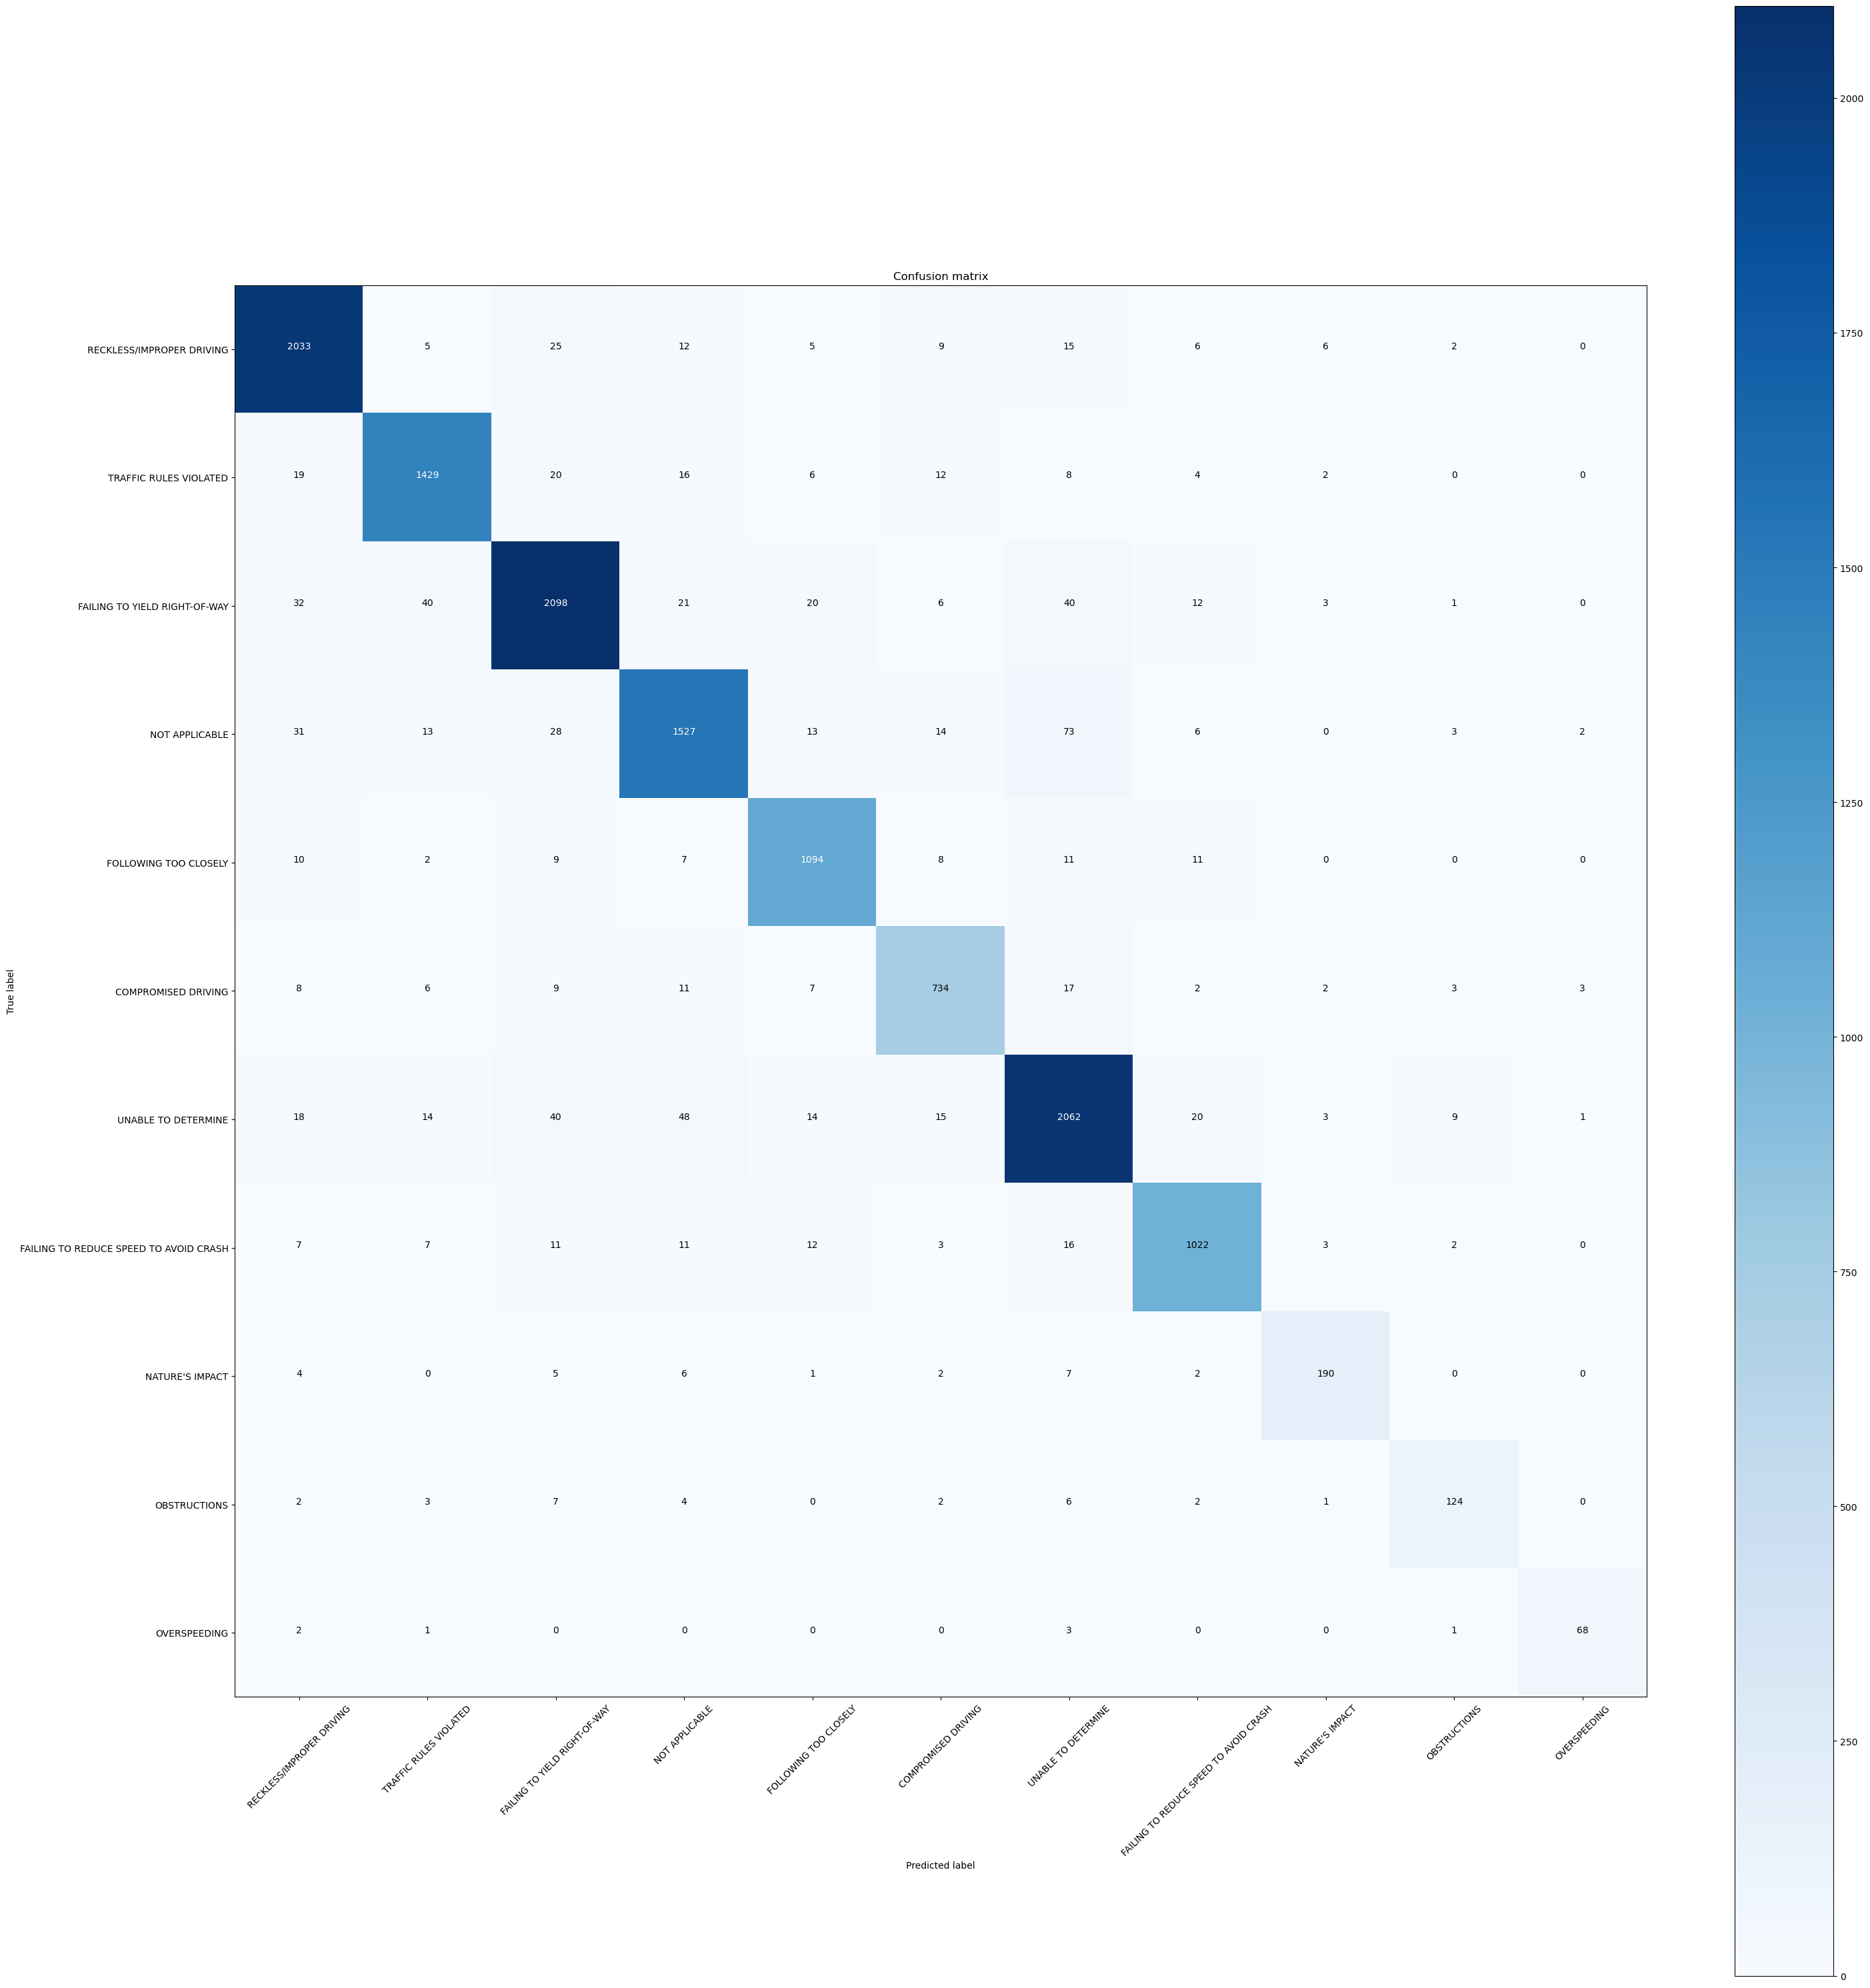

In [296]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=cm,classes=label_encoding.keys())

In [297]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [298]:
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9271781547121558
Recall: 0.9272768124625524


In [299]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2118
           1       0.94      0.94      0.94      1516
           2       0.93      0.92      0.93      2273
           3       0.92      0.89      0.91      1710
           4       0.93      0.95      0.94      1152
           5       0.91      0.92      0.91       802
           6       0.91      0.92      0.92      2244
           7       0.94      0.93      0.94      1094
           8       0.90      0.88      0.89       217
           9       0.86      0.82      0.84       151
          10       0.92      0.91      0.91        75

    accuracy                           0.93     13352
   macro avg       0.92      0.91      0.92     13352
weighted avg       0.93      0.93      0.93     13352



In [300]:
# result in model data structure

models['Model Name'].append('Decision Tree Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### KNN Model

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [302]:
# Define the KNN classifier and the parameter grid for grid search
knn = KNeighborsClassifier()

# Define parameter grid distribution
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy')

#grid_search.fit(X_train_knn_dr, y_train_resampled2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}
Best score:  0.8987024836845251


In [303]:
# Make predictions on test set with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [304]:
# Evaluate the model with cross-validation

cv_scores = cross_val_score(best_knn, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.27059617 0.26632714 0.2592121  0.2623577  0.27031683]
Mean CV score: 0.26576198796929595


In [305]:
# Make predictions on test set with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [306]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2118
           1       0.95      0.95      0.95      1516
           2       0.94      0.94      0.94      2273
           3       0.91      0.90      0.91      1710
           4       0.93      0.96      0.95      1152
           5       0.94      0.92      0.93       802
           6       0.91      0.93      0.92      2244
           7       0.96      0.93      0.94      1094
           8       0.94      0.86      0.90       217
           9       0.90      0.81      0.86       151
          10       0.92      0.91      0.91        75

    accuracy                           0.93     13352
   macro avg       0.93      0.92      0.92     13352
weighted avg       0.93      0.93      0.93     13352



Confusion matrix, without normalization


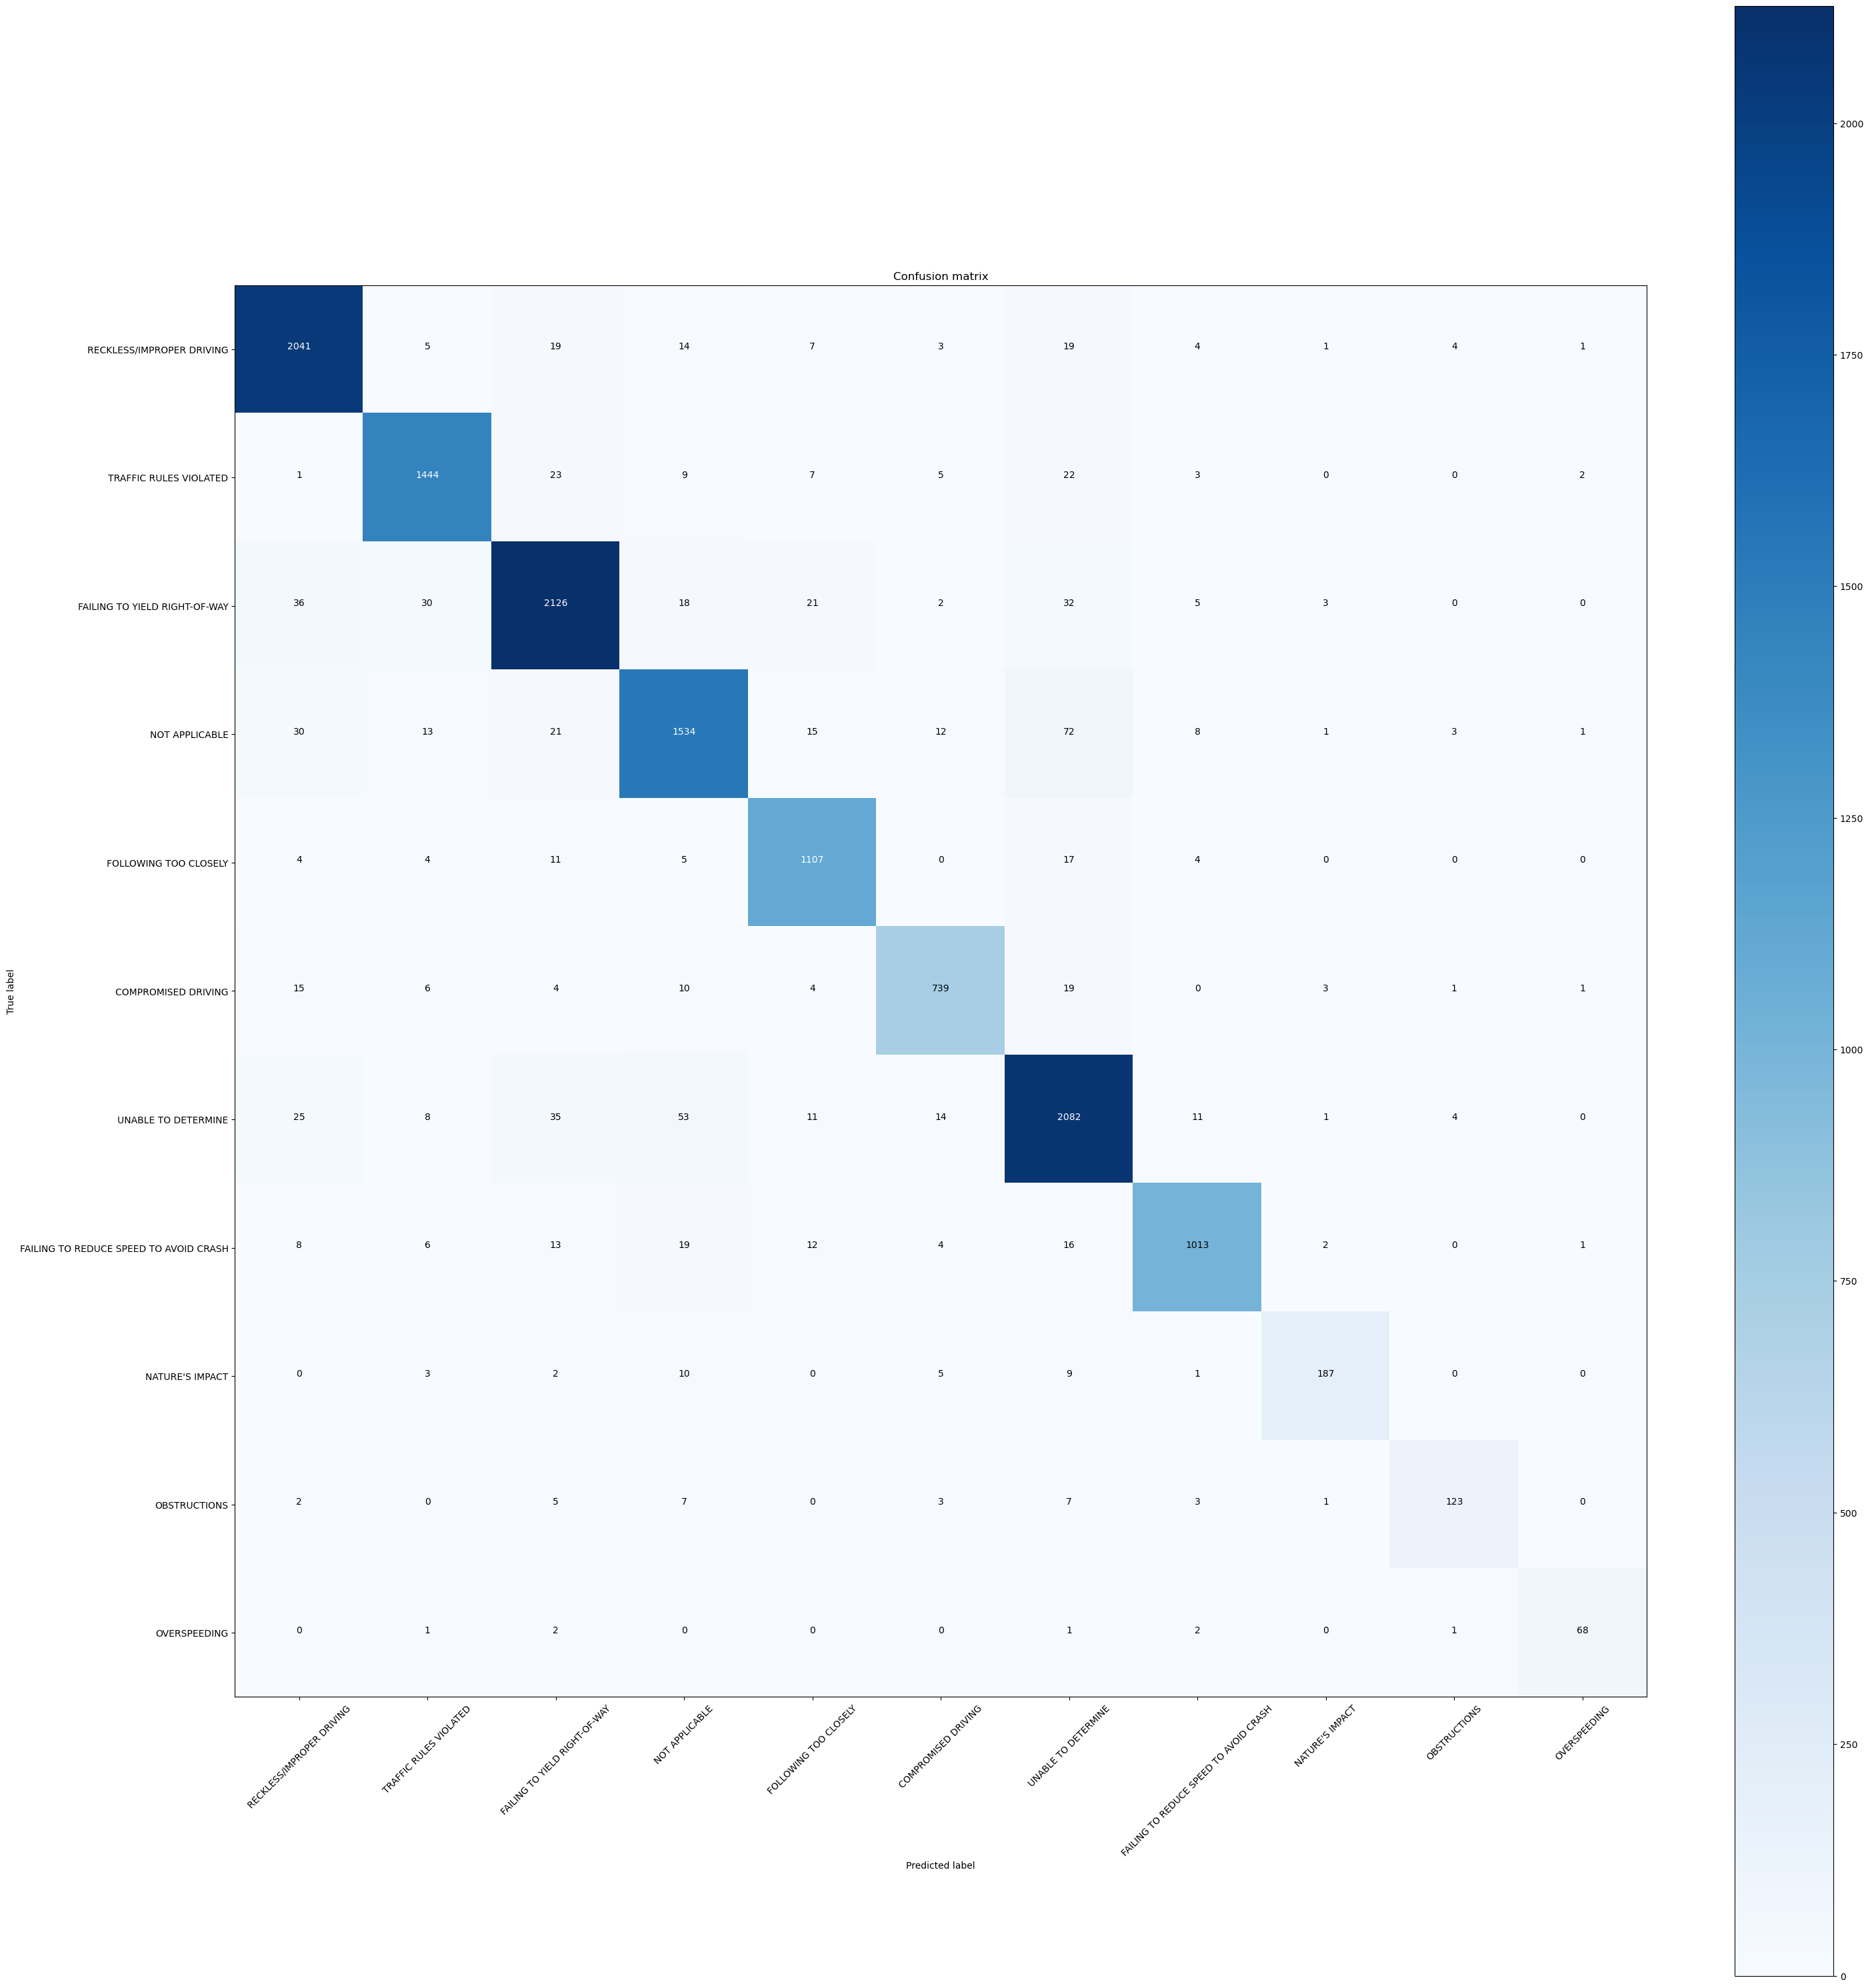

In [307]:
plot_confusion_matrix(cm=cm,classes=label_encoding.keys())

In [308]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9334931096464949
Precision: 0.9335773999536322
Recall: 0.9334931096464949


In [309]:
# result in model data structure

models['Model Name'].append('KNN MODEL')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### Random Forests Model

In [310]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [311]:
# Define Random Forest classifier with random state
RFC = RandomForestClassifier(random_state=54)

# Define parameter distribution
param_dist = {'n_estimators': [10, 50, 100, 200, 500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 10, 20, 30, 40],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform random search with cross validation
random_search = RandomizedSearchCV(RFC, param_distributions=param_dist, cv=5, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
Best score:  0.902016694204964


In [312]:
# Make predictions on test set with best parameters
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [313]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.47348712 0.46697124 0.46442481 0.46697124 0.47464609]
Mean CV score: 0.469300099552036


In [314]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2118
           1       0.95      0.95      0.95      1516
           2       0.93      0.94      0.94      2273
           3       0.93      0.90      0.91      1710
           4       0.94      0.96      0.95      1152
           5       0.95      0.93      0.94       802
           6       0.90      0.93      0.92      2244
           7       0.98      0.92      0.95      1094
           8       0.97      0.87      0.91       217
           9       0.95      0.81      0.88       151
          10       0.93      0.91      0.92        75

    accuracy                           0.94     13352
   macro avg       0.94      0.92      0.93     13352
weighted avg       0.94      0.94      0.94     13352



Confusion matrix, without normalization


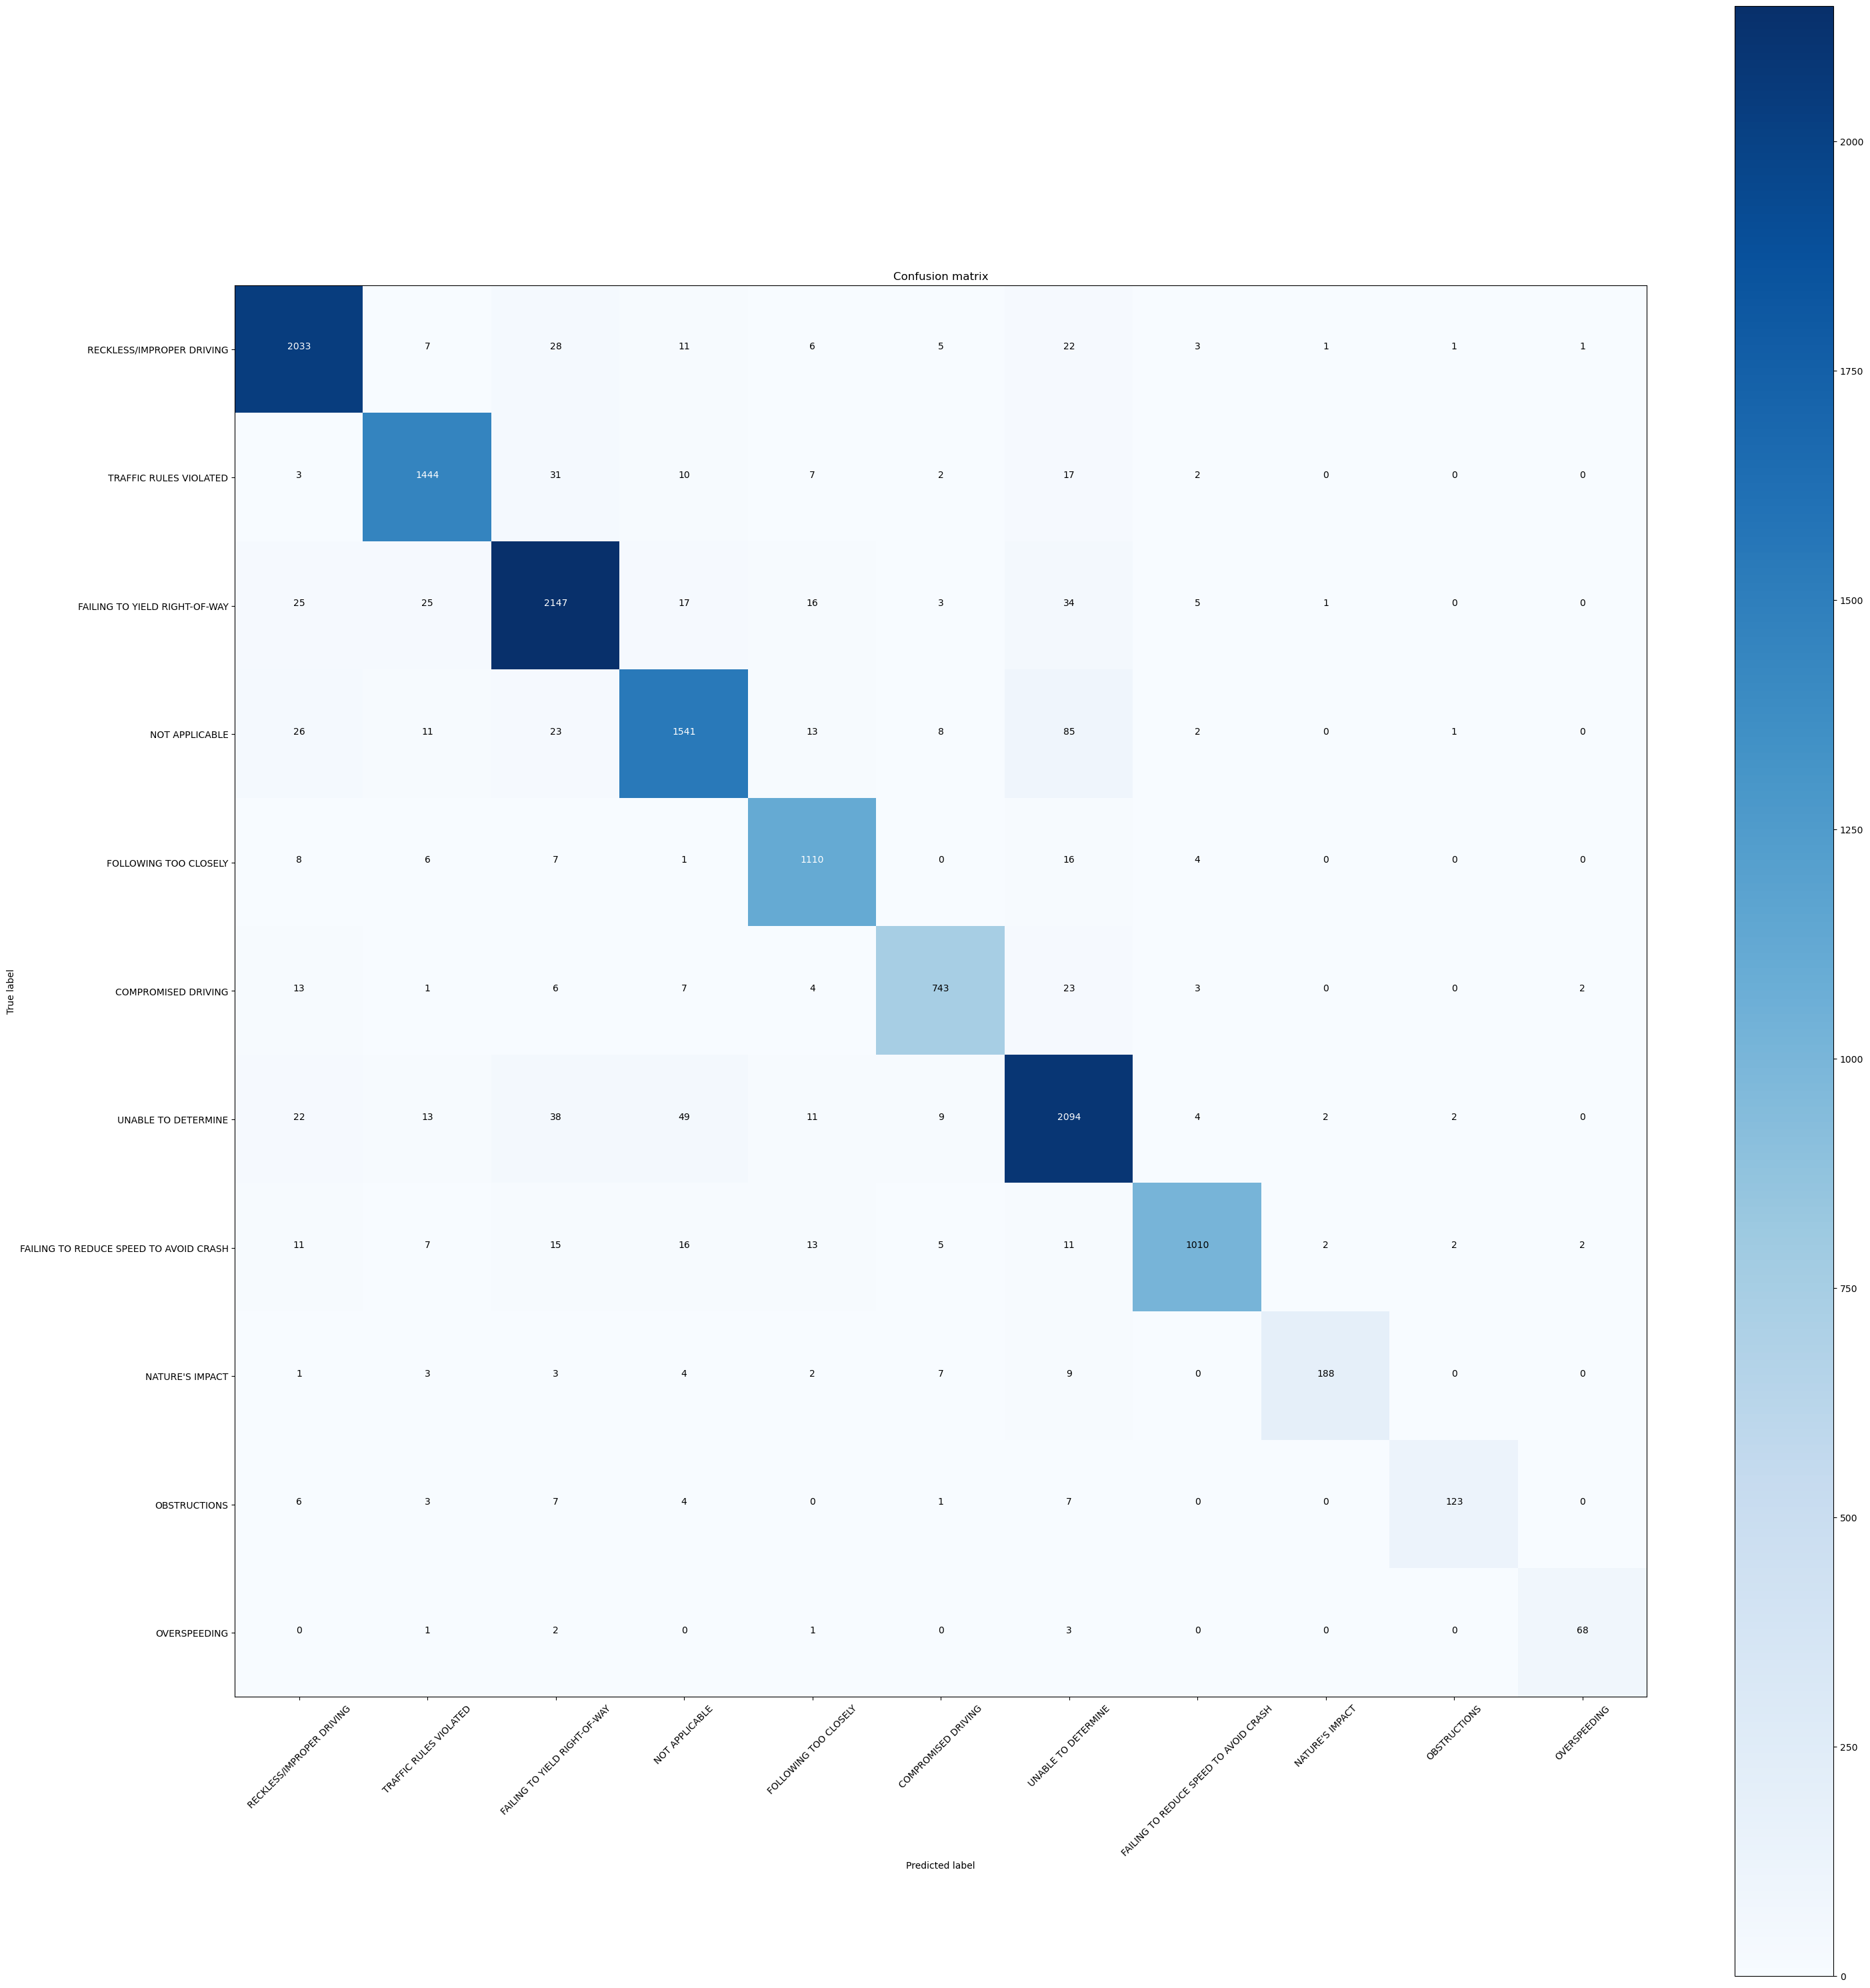

In [315]:
plot_confusion_matrix(cm=cm,classes=label_encoding.keys())

In [316]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.936264230077891
Precision: 0.9367043381008846
Recall: 0.936264230077891


In [317]:
# result in model data structure

models['Model Name'].append('Random Forest Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### XG Boost Model

In [318]:
!pip install xgboost

In [319]:
from xgboost import XGBClassifier

# Defing XG Boosting Classifier along with random state
XG = XGBClassifier(random_state=54 , reg_alpha=0.1)

# Define parameter grid
param_grid = {'n_estimators': [50, 100, 200, 500],
              'learning_rate': [0.01, 0.1, 0.5, 1],
              'max_depth': [3, 5, 7, 9]}

# Perform grid search
grid_search = GridSearchCV(XG, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 500}
Best score:  0.9401577195145053


In [320]:
# Make predictions on test set with best parameters
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [321]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_xgb, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.52396645 0.51730078 0.51640204 0.51992211 0.52805033]
Mean CV score: 0.5211283410774911


In [322]:
# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2118
           1       0.97      0.98      0.98      1516
           2       0.97      0.97      0.97      2273
           3       0.96      0.94      0.95      1710
           4       0.98      0.98      0.98      1152
           5       0.95      0.94      0.95       802
           6       0.95      0.96      0.95      2244
           7       0.99      0.97      0.98      1094
           8       0.94      0.92      0.93       217
           9       0.95      0.84      0.89       151
          10       0.95      0.95      0.95        75

    accuracy                           0.97     13352
   macro avg       0.96      0.95      0.96     13352
weighted avg       0.97      0.97      0.97     13352



Confusion matrix, without normalization


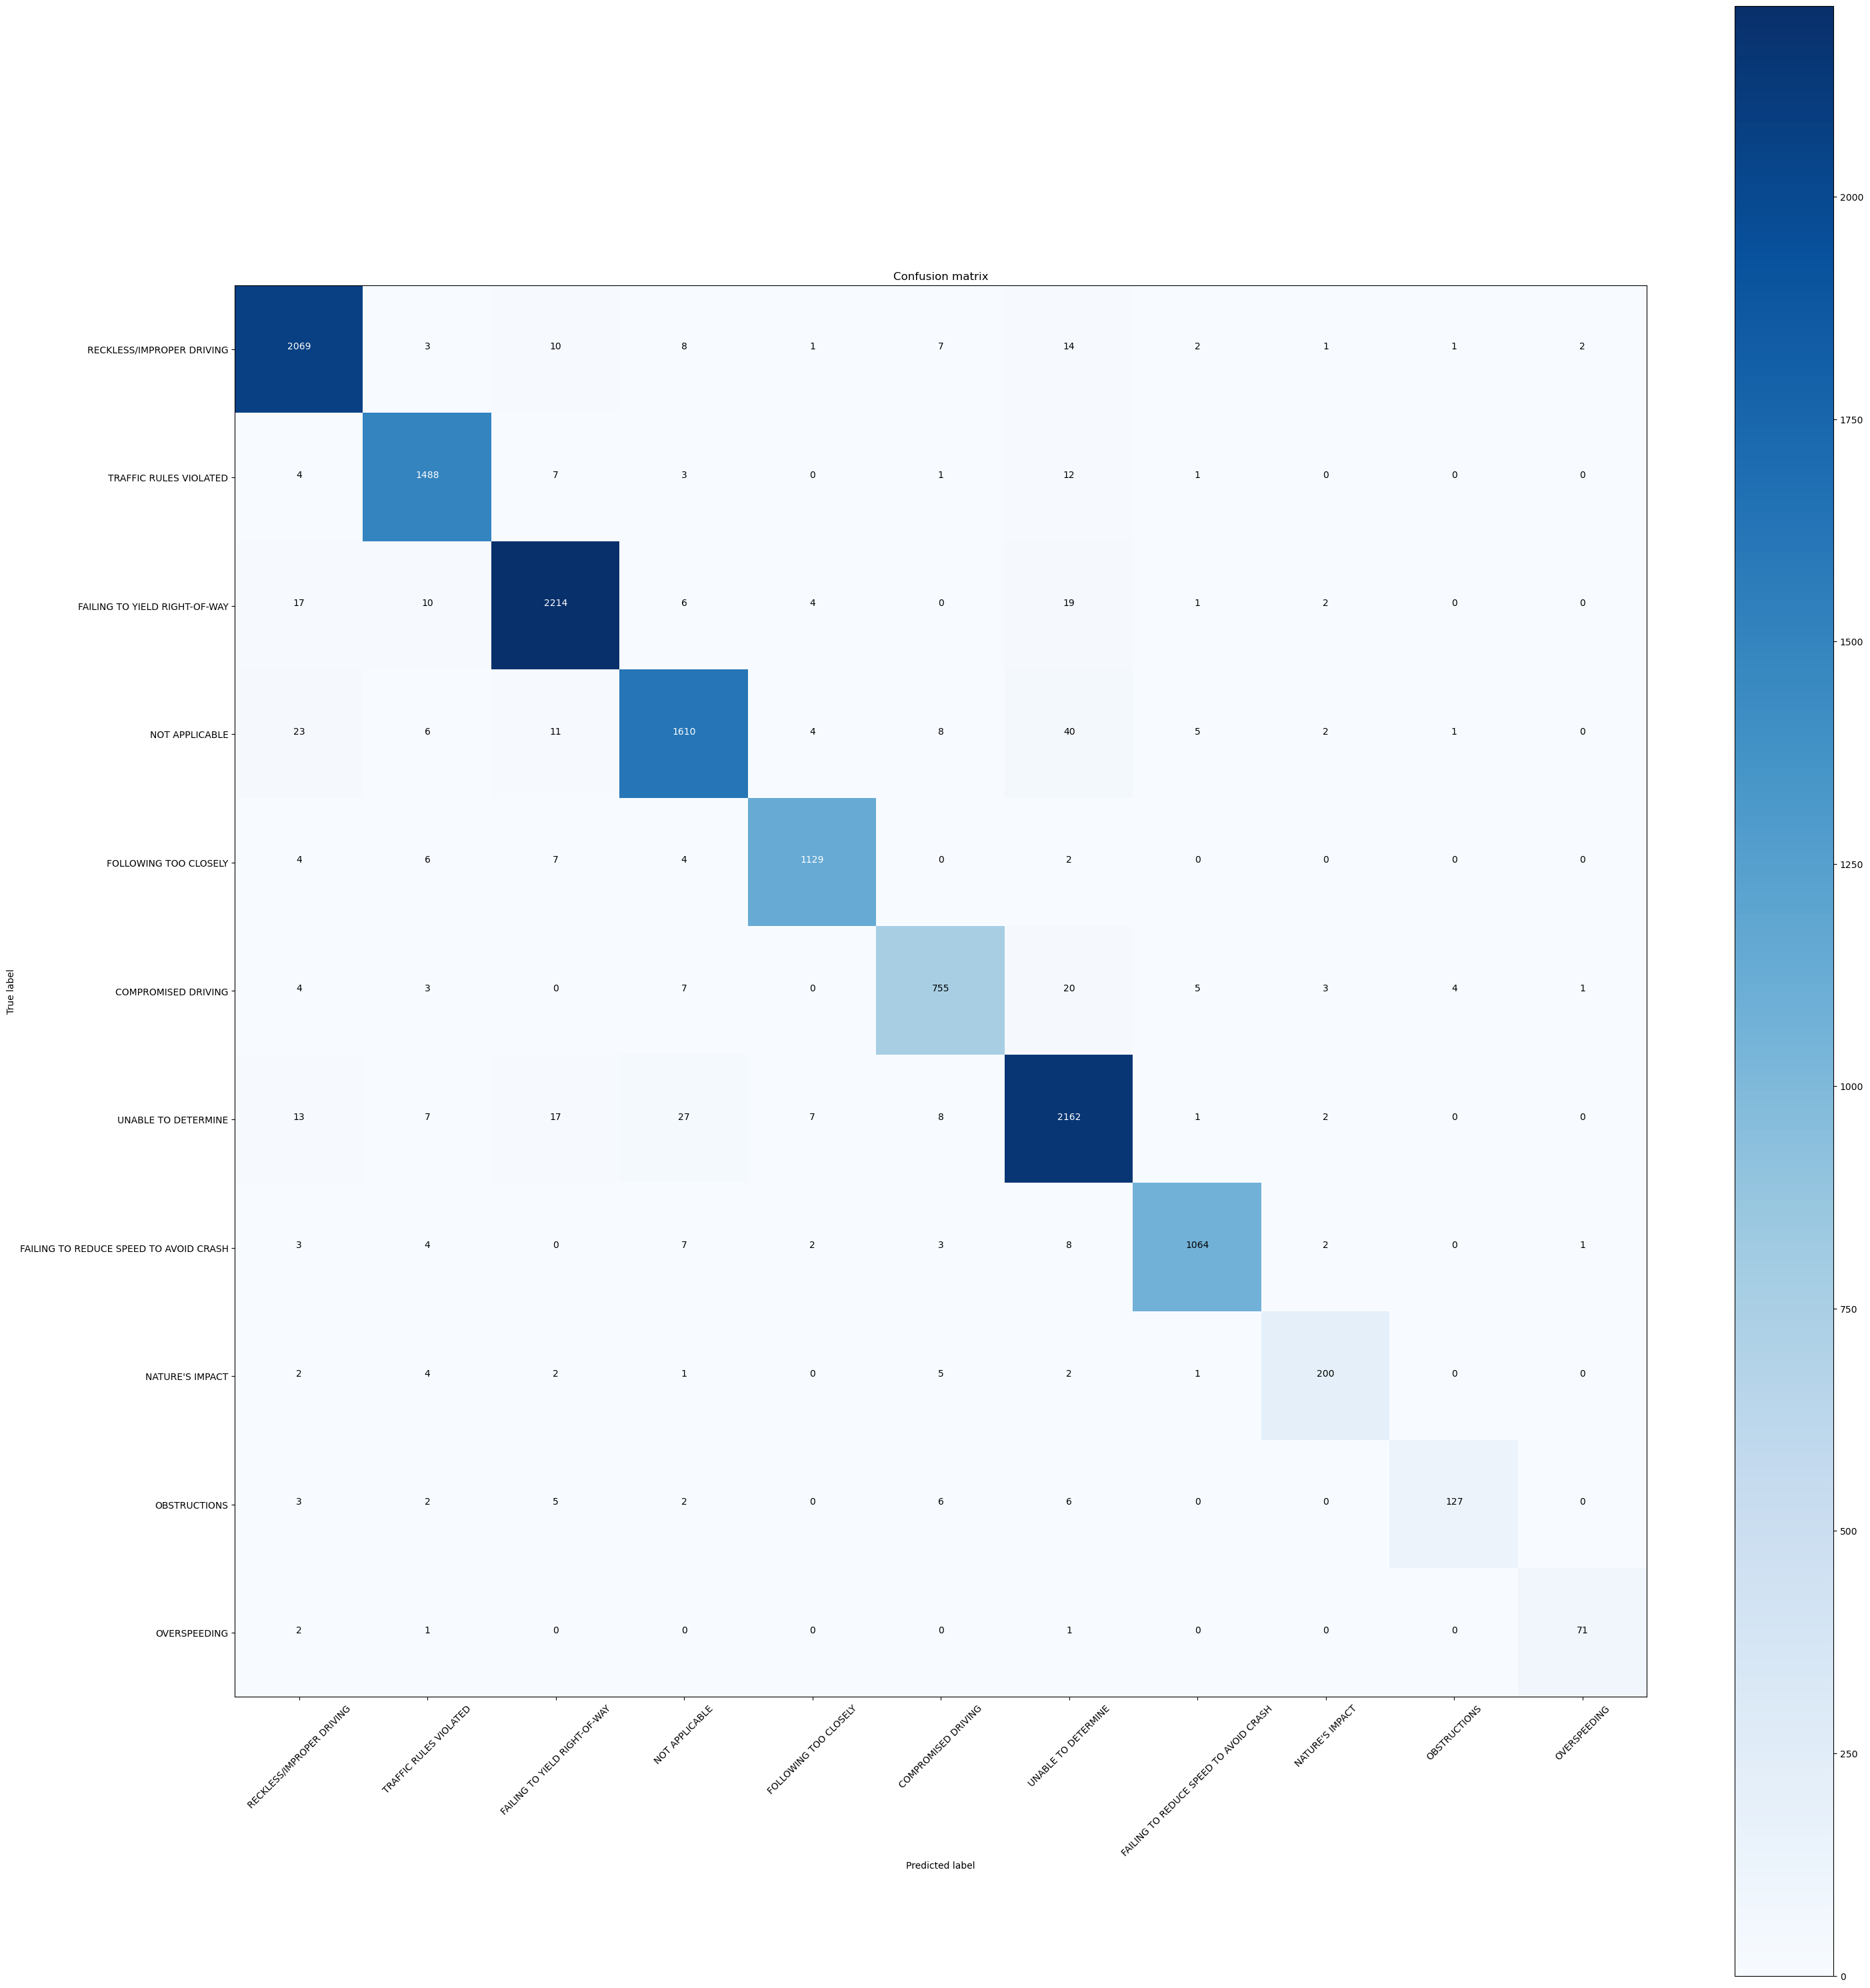

In [323]:
plot_confusion_matrix(cm=cm,classes=label_encoding.keys())

In [324]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9653235470341522
Precision: 0.9653652704430368
Recall: 0.9653235470341522


In [325]:
# result in model data structure

models['Model Name'].append('XG Booster Classifier')
models['Accuracy'].append(accuracy)
models['CV Score'].append(np.mean(cv_scores))
models['Precision'].append(precision)
models['Recall'].append(recall)

### Models Comparison

In [326]:
# Creating Dataframe of Model Evaluation
models = pd.DataFrame(models)

# top model based on Accurary
models.sort_values(by='Accuracy', ascending= False)

,Model Name,Accuracy,CV Score,Precision,Recall
3,XG Booster Classifier,0.965324,0.521128,0.965365,0.965324
2,Random Forest Classifier,0.936264,0.469300,0.936704,0.936264
1,KNN MODEL,0.933493,0.265762,0.933577,0.933493
0,Decision Tree Classifier,0.927277,0.858539,0.927178,0.927277


In [327]:
# top model based on CV Score
models.sort_values(by='CV Score', ascending= False)

,Model Name,Accuracy,CV Score,Precision,Recall
0,Decision Tree Classifier,0.927277,0.858539,0.927178,0.927277
3,XG Booster Classifier,0.965324,0.521128,0.965365,0.965324
2,Random Forest Classifier,0.936264,0.469300,0.936704,0.936264
1,KNN MODEL,0.933493,0.265762,0.933577,0.933493


In [328]:
# top model based on Recall Score
models.sort_values(by='Recall', ascending= False)

,Model Name,Accuracy,CV Score,Precision,Recall
3,XG Booster Classifier,0.965324,0.521128,0.965365,0.965324
2,Random Forest Classifier,0.936264,0.469300,0.936704,0.936264
1,KNN MODEL,0.933493,0.265762,0.933577,0.933493
0,Decision Tree Classifier,0.927277,0.858539,0.927178,0.927277


## Final Model Evlauation

In [329]:
models.sort_values(by='Accuracy', ascending= False).head(1)

,Model Name,Accuracy,CV Score,Precision,Recall
3,XG Booster Classifier,0.965324,0.521128,0.965365,0.965324


## Conclusion

### Improvements

### Next Steps

### Recommendations

## Disregard

It would be helpful to take a look at the data for a general understanding of the undeerlying pattern.

In [330]:
df = crashes_df.copy()

In [331]:
df[['date', 'time', 'AM/PM']] = df.CRASH_DATE.str.split(expand=True)

In [332]:
df.date = pd.to_datetime(df['date'])

In [333]:
df.time = pd.to_datetime(df.time)

<AxesSubplot:>

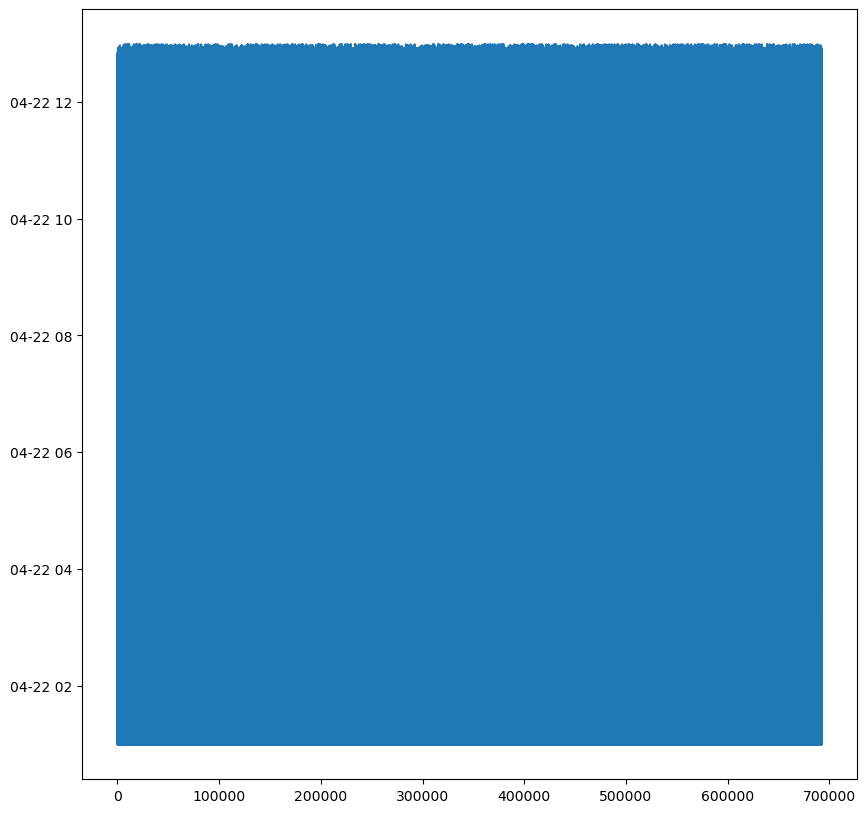

In [334]:
df.time.plot()

In [335]:
df = crashes_df.copy()

df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [336]:
crashes_df['CRASH_DATE'].map(lambda x: dt.datetime.strftime(x, '%m/%d/%Y %H:%M:%S %p'))

TypeError: descriptor 'strftime' requires a 'datetime.date' object but received a 'str'

In [ ]:
crashes_dfdf['CRASH_DATE']

In [ ]:
#check unique values
crashes_df['NOT_RIGHT_OF_WAY_I'].value_counts()

In [ ]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS'
                                         ], 'OVERSPEEDING', inplace=True)

In [ ]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
                                         ], "NATURE'S IMPACT", inplace=True)

In [ ]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                         ], 'OBSTRUCTIONS', inplace=True)

In [ ]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)

In [ ]:
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER']['SEAT_NO'].value_counts()

In [ ]:
cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['SEAT_NO'].fillna(1.0, inplace=True)

Change it back to categorical

Come back to it

Possibly create a new feature explaining which units were invlved in the crash and whether there was a passenger in there. 

In [ ]:
numerical_features = [col[i] for i in (0,1,8,11,12,13,14,15,16,17,23,29,38)]
numerical_features

In [ ]:
categorical_features = [col[i] for i in range(len(col)) if col[i] not in numerical_features]
categorical_features

In [ ]:
X_train_ohe.head()

In [ ]:
ct = ColumnTransformer([("encoder", OneHotEncoder(), categorical_features)], remainder="passthrough")
X_train_ohe = ct.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2, metric="manhattan").fit(X_train_ohe)
distances, indices = nbrs.kneighbors(X_train_ohe)

In [ ]:
smote = SMOTE(sampling_strategy="minority", k_neighbors=5, metric="precomputed")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ohe, y)

In [ ]:
X_resampled = pd.DataFrame(X_resampled, columns=ct.get_feature_names())
X_resampled[categorical_features] = X_resampled[categorical_features].idxmax(axis=1).str.split("_", expand=True)[1]

In [ ]:
sm = SMOTENC(random_state=42, categorical_features=[3])#,4,5,6,7,8,9,10,18,19,20,21,22,24,
                                                    #25,26,27,28,29,30,32,33,34,35,36,37,38,39,40])
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)